In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import font_manager
import statsmodels.api as sm
from statsmodels.formula.api import ols
import linearmodels.panel as pnd
from scipy import stats
from linearmodels import IV2SLS

In [2]:
data = pd.read_csv('Web Analysis Coding/DataClean_V2.csv')
id_ = data['Unnamed: 0']
data = data.drop(['Unnamed: 0','Firm','director_name','flim_其他','actor_num','comment_num'],axis=1)
data['id'] = id_
data = sm.add_constant(data)

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1911 entries, 0 to 1910
Data columns (total 37 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   const                1911 non-null   float64
 1   Score                1911 non-null   float64
 2   num_photo            1911 non-null   int64  
 3   ver_bin              1911 non-null   int64  
 4   announce_value_mean  1911 non-null   float64
 5   flim_冒险              1911 non-null   int64  
 6   flim_剧情              1911 non-null   int64  
 7   flim_动作              1911 non-null   int64  
 8   flim_动画              1911 non-null   int64  
 9   flim_喜剧              1911 non-null   int64  
 10  flim_奇幻              1911 non-null   int64  
 11  flim_家庭              1911 non-null   int64  
 12  flim_悬疑              1911 non-null   int64  
 13  flim_惊悚              1911 non-null   int64  
 14  flim_爱情              1911 non-null   int64  
 15  flim_犯罪              1911 non-null   i

In [4]:
data = data[data['sale_1stWeek'] != '暂无']
data= data[data['sale_cum'] != '暂无']
data.sale_1stWeek = data.sale_1stWeek.astype(float)
data.sale_cum = data.sale_cum.astype(float)
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1873 entries, 0 to 1910
Data columns (total 37 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   const                1873 non-null   float64
 1   Score                1873 non-null   float64
 2   num_photo            1873 non-null   int64  
 3   ver_bin              1873 non-null   int64  
 4   announce_value_mean  1873 non-null   float64
 5   flim_冒险              1873 non-null   int64  
 6   flim_剧情              1873 non-null   int64  
 7   flim_动作              1873 non-null   int64  
 8   flim_动画              1873 non-null   int64  
 9   flim_喜剧              1873 non-null   int64  
 10  flim_奇幻              1873 non-null   int64  
 11  flim_家庭              1873 non-null   int64  
 12  flim_悬疑              1873 non-null   int64  
 13  flim_惊悚              1873 non-null   int64  
 14  flim_爱情              1873 non-null   int64  
 15  flim_犯罪              1873 non-null   i

## Explaination of Features

#### ver_bin: whether the film is 3D, 1 for yes, 0 for no;
#### announce_mean: average watching of announce records of film
#### type_of_film: we split type of film into several categories and get each category a dummy variable
#### country: country of origin of film (Mainland China, Hongkong, Macao and Taiwan, America, Japan and Others )
#### range_vale: file's length
#### time: on show date time of film
#### story_length: the length of introduction of story
#### story_symbol: whether there is a suspense in the introduction of story
#### comment_likes: average number of likes for hot comment
#### comment_length: average length of hot comment
#### sale_1stWeek: ticket sale of the first week
#### sale_cum: total ticket sale of film
#### director_num: number of director
#### actor_num: number of actor
#### reward: whether the film get a reward, 1 for yes, 0 for no
#### num_photo: number of photo for promotion

In [5]:
data.columns

Index(['const', 'Score', 'num_photo', 'ver_bin', 'announce_value_mean',
       'flim_冒险', 'flim_剧情', 'flim_动作', 'flim_动画', 'flim_喜剧', 'flim_奇幻',
       'flim_家庭', 'flim_悬疑', 'flim_惊悚', 'flim_爱情', 'flim_犯罪', 'flim_科幻',
       'country_大陆', 'country_香港', 'country_台湾', 'country_日本', 'country_美国',
       'range_min', 'time', 'on_show_y', 'on_show_m', 'on_show_d',
       'story_length', 'story_symbol', 'comment_length', 'comment_likes',
       'sale_1stWeek', 'sale_cum', 'director_num', 'actor_num_new',
       'reward_dummy', 'id'],
      dtype='object')

In [6]:
dummies = ['ver_bin','flim_冒险','flim_剧情','flim_动作','flim_动画','flim_喜剧','flim_奇幻','flim_家庭','flim_悬疑','flim_惊悚',
           'flim_爱情','flim_犯罪','flim_科幻','country_大陆','country_香港','country_台湾','country_日本','country_美国','story_symbol',
          'reward_dummy']
variables = ['num_photo','announce_value_mean','range_min','story_length','comment_length','comment_likes','director_num','actor_num_new']
dependent = ['Score','sale_1stWeek','sale_cum']
others = ['time','on_show_y','on_show_m','on_show_d']

#### dummies: the dummies variable set
#### variables: the numerical variable set
#### dependent: the dependent variable set
#### others: some time features

<ipython-input-7-235283d41478>:10: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig_.show()


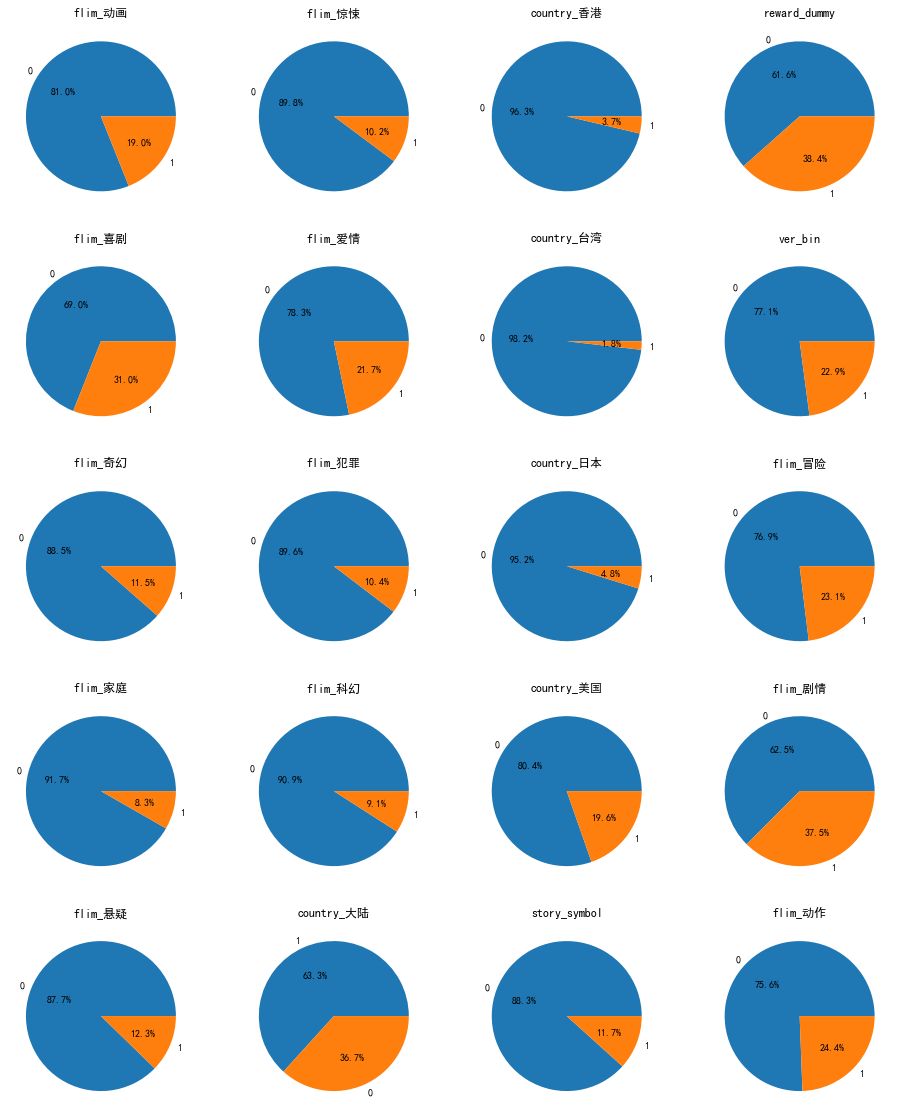

In [7]:
# Exporation of dummy variables
fig_,ax_=plt.subplots(5,4,figsize=(16,20))
my_font = font_manager.FontProperties(fname="C:/Windows/Fonts/simsun.ttf") # 添加中文字体为黑体
plt.rcParams['font.sans-serif']=['SimHei']
plt.rcParams['axes.unicode_minus'] = False
for i in range(len(dummies)):
    y = (i+1)// 5
    x = (i+1) % 5
    data[dummies[i]].value_counts().rename('',inplace=True).plot.pie(ax=ax_[x,y-1],autopct= '%1.1f%%',title=dummies[i])
fig_.show()

It could be better to merge 'country_日本', 'country_台湾' and 'country_香港' into one feature.

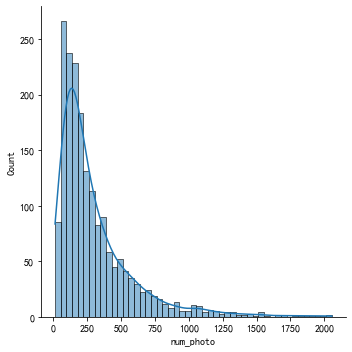

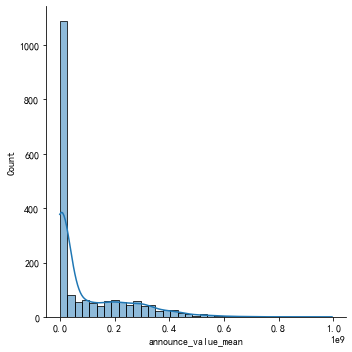

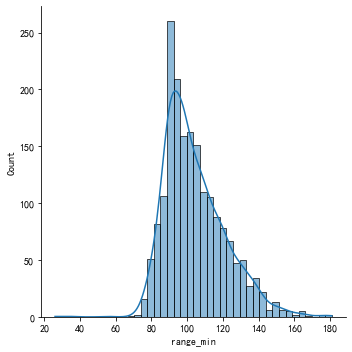

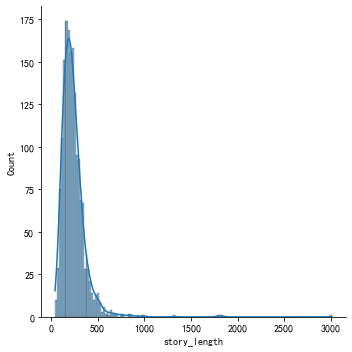

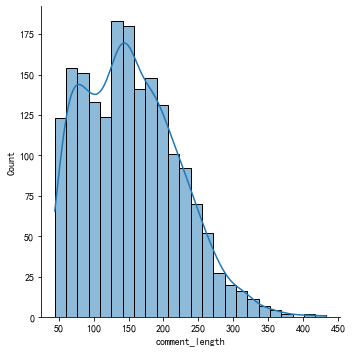

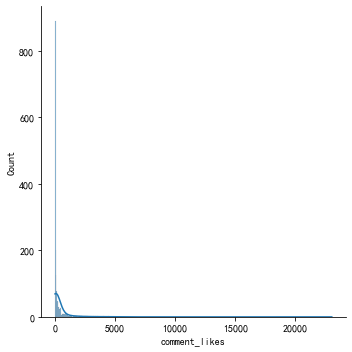

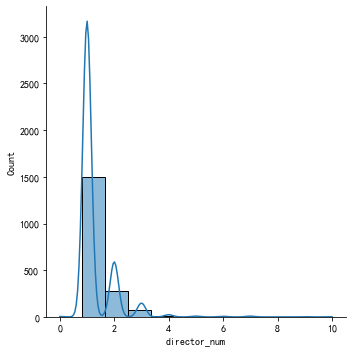

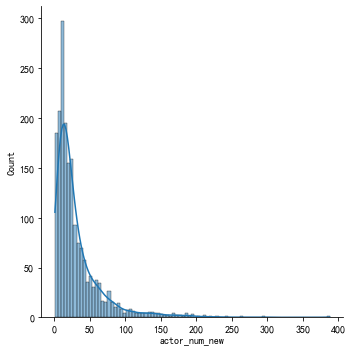

In [8]:
# Exporation of numerical variables
for var in variables:
    sns.displot(data[var],kde=True)

##### From the plot, most variables may need a log transformation, we set them into some level of needing
###### Level 1: num_photo, announce_value_mean,comment_length,comment_likes, director_num, actor_num_new
###### Level 2: story_length, comment_length,  range_min

In [9]:
log_1 = ['num_photo','announce_value_mean','comment_likes','director_num','actor_num_new']
log_2 = ['story_length','comment_length','range_min']
log_1_list = []
log_2_list = []
for feature in log_1:
    log_feature = 'log_'+feature
    log_1_list.append(log_feature)
    data[log_feature] = np.log(data[feature])
for feature in log_2:
    log_feature = 'log_'+feature
    log_2_list.append(log_feature)
    data[log_feature] = np.log(data[feature])

F:\Download\lib\site-packages\pandas\core\series.py:726: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


<AxesSubplot:>

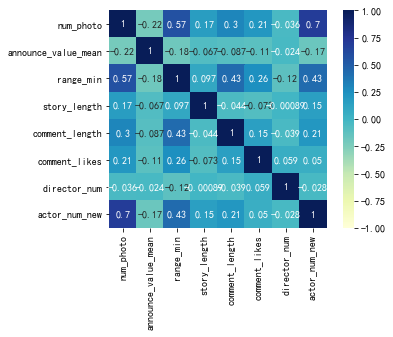

In [10]:
sns.heatmap(data[variables].corr(),annot=True, vmax=1,vmin = -1, xticklabels= True, yticklabels= True, square=True, cmap="YlGnBu")

<AxesSubplot:>

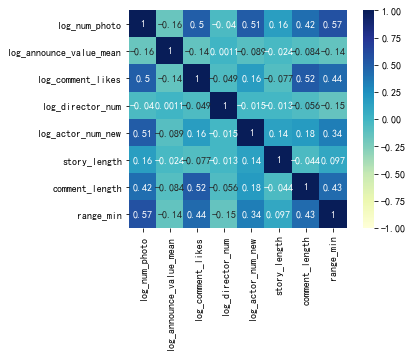

In [11]:
sns.heatmap(data[log_1_list+log_2].corr(),annot=True, vmax=1,vmin = -1, xticklabels= True, yticklabels= True, square=True, cmap="YlGnBu")

<AxesSubplot:>

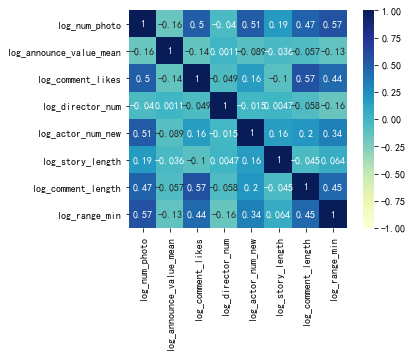

In [12]:
sns.heatmap(data[log_1_list+log_2_list].corr(),annot=True, vmax=1,vmin = -1, xticklabels= True, yticklabels= True, square=True, cmap="YlGnBu")

In [13]:
correlation = data.drop(others+dependent,axis=1)
for i in correlation.columns:
    for j in correlation.columns:
        if i != j and i not in j and j not in i:
            cor_ef = correlation.corr()[i][j]
            if cor_ef >= 0.7:
                print(cor_ef,i,j)

We know that most of them are not highly correlative

In [14]:
data[dependent]

,Score,sale_1stWeek,sale_cum
0,8.2,298.0,498.0
1,8.2,264.0,549.0
2,8.2,223.0,321.0
3,8.2,9104.0,13266.0
4,8.2,32.0,73.0
...,...,...,...
1906,3.3,93.0,234.0
1907,3.2,16.0,22.0
1908,3.1,153.0,290.0
1909,3.0,85.0,155.0


In [15]:
data[dependent].corr()

,Score,sale_1stWeek,sale_cum
Score,1.000000,0.212246,0.274580
sale_1stWeek,0.212246,1.000000,0.873876
sale_cum,0.274580,0.873876,1.000000


<AxesSubplot:>

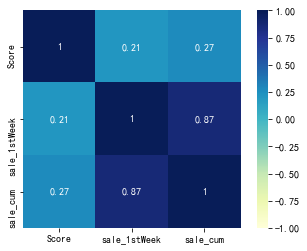

In [16]:
sns.heatmap(data[dependent].corr(),annot=True, vmax=1,vmin = -1, xticklabels= True, yticklabels= True, square=True, cmap="YlGnBu")

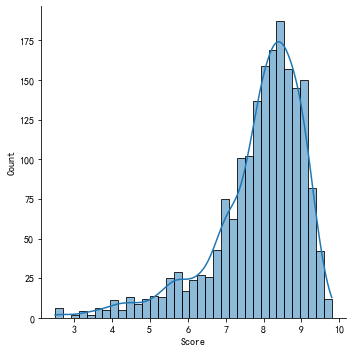

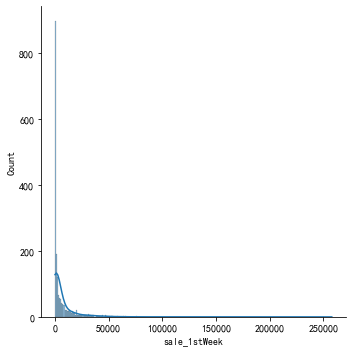

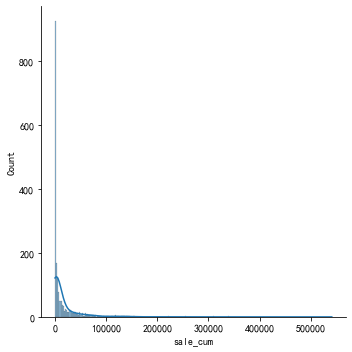

In [17]:
# Exporation of dependent variables
for dep in dependent:
    sns.displot(data[dep],kde=True)

'sale_1stWeek' and 'sale_cum' need log transformation

In [18]:
data['log_sale_1stWeek'] = np.log(data['sale_1stWeek'])
data['log_sale_cum'] = np.log(data['sale_cum'])

<AxesSubplot:>

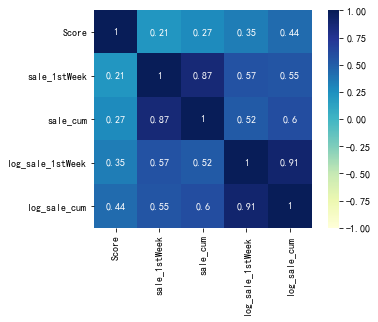

In [19]:
log_dependent = ['log_sale_1stWeek','log_sale_cum']
sns.heatmap(data[dependent+log_dependent].corr(),annot=True, vmax=1,vmin = -1, xticklabels= True, yticklabels= True, square=True, cmap="YlGnBu")

In [20]:
print(variables)
print(dependent)
print(others)
print(dummies)
print(log_1)
print(log_2)
print(log_1_list)
print(log_2_list)
#var_str = ''
#dum_str = ''
#for i in variables:
#    var_str = var_str + i + '+'
#var_str = var_str[:-1]
#for i in dummies:
#    dum_str = dum_str + i + '+'
#dum_str = dum_str[:-1]

['num_photo', 'announce_value_mean', 'range_min', 'story_length', 'comment_length', 'comment_likes', 'director_num', 'actor_num_new']
['Score', 'sale_1stWeek', 'sale_cum']
['time', 'on_show_y', 'on_show_m', 'on_show_d']
['ver_bin', 'flim_冒险', 'flim_剧情', 'flim_动作', 'flim_动画', 'flim_喜剧', 'flim_奇幻', 'flim_家庭', 'flim_悬疑', 'flim_惊悚', 'flim_爱情', 'flim_犯罪', 'flim_科幻', 'country_大陆', 'country_香港', 'country_台湾', 'country_日本', 'country_美国', 'story_symbol', 'reward_dummy']
['num_photo', 'announce_value_mean', 'comment_likes', 'director_num', 'actor_num_new']
['story_length', 'comment_length', 'range_min']
['log_num_photo', 'log_announce_value_mean', 'log_comment_likes', 'log_director_num', 'log_actor_num_new']
['log_story_length', 'log_comment_length', 'log_range_min']


In [21]:
def checkVIF(df):
    from statsmodels.stats.outliers_influence import variance_inflation_factor
    name = df.columns
    x = np.matrix(df)
    VIF_list = [variance_inflation_factor(x,i) for i in range(x.shape[1])]
    VIF = pd.DataFrame({'feature':name,"VIF":VIF_list})
    max_VIF = max(VIF_list)
    print(max_VIF)
    return VIF

### Model 1 sets -> OLS without transformation

In [22]:
checkVIF(data[variables+dummies+['const']])

99.05538734595451


,feature,VIF
0,num_photo,3.588109
1,announce_value_mean,1.111095
2,range_min,2.176910
3,story_length,1.095877
4,comment_length,1.384279
5,comment_likes,1.153127
6,director_num,1.108685
7,actor_num_new,2.423673
8,ver_bin,1.667583
9,flim_冒险,1.744842


In [23]:
var_str = ''
for i in variables:
    if i != 'range_min':
        var_str = var_str + i + '+'
var_str = var_str[:-1]
dum_str = ''
for i in dummies:
    dum_str = dum_str + i + '+'
dum_str = dum_str[:-1]
independent = var_str + '+' + dum_str
independent

'num_photo+announce_value_mean+story_length+comment_length+comment_likes+director_num+actor_num_new+ver_bin+flim_冒险+flim_剧情+flim_动作+flim_动画+flim_喜剧+flim_奇幻+flim_家庭+flim_悬疑+flim_惊悚+flim_爱情+flim_犯罪+flim_科幻+country_大陆+country_香港+country_台湾+country_日本+country_美国+story_symbol+reward_dummy'

#### sub_model 1 for y = Score

In [24]:
formula = 'Score~' + independent
result_1_1 = ols(formula,data).fit()
result_1_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Score   R-squared:                       0.440
Model:                            OLS   Adj. R-squared:                  0.432
Method:                 Least Squares   F-statistic:                     53.68
Date:                Sun, 29 May 2022   Prob (F-statistic):          1.48e-209
Time:                        20:51:22   Log-Likelihood:                -2486.6
No. Observations:                1873   AIC:                             5029.
Df Residuals:                    1845   BIC:                             5184.
Df Model:                          27                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept               7.4346      0.120     62.168      0.000       7.200       7.669
num_photo               0.0007      0.000      5.175      0.000       0.000       0.001
announce_value_mean  1.977e-12   1.57e-10      0.013      0.990   -3.07e-10    3.11e-10
story_length        -2.075e-05      0.000     -0.137      0.891      -0.000       0.000
comment_length          0.0043      0.000     12.008      0.000       0.004       0.005
comment_likes        8.628e-05   1.49e-05      5.781      0.000     5.7e-05       0.000
director_num           -0.0487      0.032     -1.546      0.122      -0.111       0.013
actor_num_new          -0.0006      0.001     -0.625      0.532      -0.002       0.001
ver_bin                -0.1166      0.065     -1.786      0.074      -0.245       0.011
flim_冒险                -0.0151      0.067     -0.226      0.821      -0.146       0.116
flim_剧情                 0.0951      0.055      1.743      0.081      -0.012       0.202
flim_动作                -0.0971      0.063     -1.542      0.123      -0.221       0.026
flim_动画                 0.6654      0.077      8.658      0.000       0.515       0.816
flim_喜剧                 0.0187      0.052      0.359      0.720      -0.083       0.121
flim_奇幻                -0.2102      0.073     -2.893      0.004      -0.353      -0.068
flim_家庭                 0.1212      0.081      1.502      0.133      -0.037       0.279
flim_悬疑                -0.3904      0.076     -5.125      0.000      -0.540      -0.241
flim_惊悚                -1.1014      0.086    -12.872      0.000      -1.269      -0.934
flim_爱情                -0.1887      0.060     -3.136      0.002      -0.307      -0.071
flim_犯罪                 0.2785      0.078      3.575      0.000       0.126       0.431
flim_科幻                -0.2856      0.087     -3.291      0.001      -0.456      -0.115
country_大陆             -0.5491      0.067     -8.251      0.000      -0.680      -0.419
country_香港             -0.1799      0.117     -1.541      0.123      -0.409       0.049
country_台湾             -0.3396      0.166     -2.040      0.042      -0.666      -0.013
country_日本             -0.2499      0.119     -2.109      0.035      -0.482      -0.017
country_美国             -0.0824      0.086     -0.957      0.339      -0.251       0.087
story_symbol           -0.0514      0.068     -0.756      0.450      -0.185       0.082
reward_dummy            0.2478      0.052      4.729      0.000       0.145       0.351
==============================================================================
Omnibus:                      362.021   Durbin-Watson:                   0.827
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              900.554
Skew:                          -1.046   Prob(JB):                    2.80e-196
Kurtosis:                       5.677  

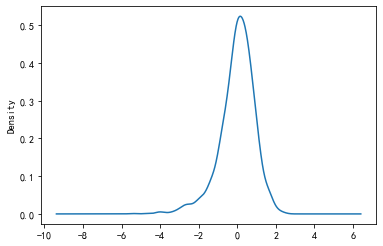

In [25]:
plt.figure()
#ols.fit().model is a method to access to the residual.
result_1_1.resid.plot.density()
plt.show()

In [26]:
stats.kstest(result_1_1.resid, 'norm', (result_1_1.resid.mean(), result_1_1.resid.std()))

KstestResult(statistic=0.07450235628690588, pvalue=1.7347438403367224e-09)

<AxesSubplot:>

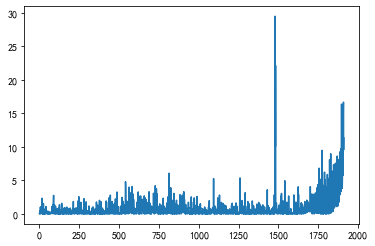

In [27]:
np.square(result_1_1.resid).plot()

In [28]:
data.time=pd.to_datetime(data.time)
panel = data.set_index(['id','time'])

#### Simple OLS Model for Model_1_1

In [29]:
Pooledmod_1_1 = pnd.PooledOLS(panel.Score, panel[variables+dummies])
Pooled_res_1_1 = Pooledmod_1_1.fit(cov_type='robust')
print(Pooled_res_1_1)

                          PooledOLS Estimation Summary                          
Dep. Variable:                  Score   R-squared:                        0.9800
Estimator:                  PooledOLS   R-squared (Between):              0.9800
No. Observations:                1873   R-squared (Within):               0.0000
Date:                Sun, May 29 2022   R-squared (Overall):              0.9800
Time:                        20:51:24   Log-likelihood                   -2877.0
Cov. Estimator:                Robust                                           
                                        F-statistic:                      3235.7
Entities:                        1873   P-value                           0.0000
Avg Obs:                       1.0000   Distribution:                 F(28,1845)
Min Obs:                       1.0000                                           
Max Obs:                       1.0000   F-statistic (robust):             4128.9
                            

#### Fixed Effect Model for Model_1_1

In [30]:
FEmod_1_1 = pnd.PanelOLS(panel.Score, panel[variables+dummies], time_effects=True,drop_absorbed=True)
FEmod_1_1 = FEmod_1_1.fit(cov_type='clustered')
print(FEmod_1_1)

                          PanelOLS Estimation Summary                           
Dep. Variable:                  Score   R-squared:                        0.4694
Estimator:                   PanelOLS   R-squared (Between):              0.3337
No. Observations:                1873   R-squared (Within):               0.0000
Date:                Sun, May 29 2022   R-squared (Overall):              0.3337
Time:                        20:51:24   Log-likelihood                   -1839.1
Cov. Estimator:             Clustered                                           
                                        F-statistic:                      33.023
Entities:                        1873   P-value                           0.0000
Avg Obs:                       1.0000   Distribution:                 F(28,1045)
Min Obs:                       1.0000                                           
Max Obs:                       1.0000   F-statistic (robust):             21.667
                            

#### Random Effect Model for Model_1_1

In [31]:
#Random Effect Model is almost unavailable
#REmod_1_1 = pnd.RandomEffects(panel.Score, panel[variables+dummies])
#re_res = REmod_1_1.fit(cov_type = 'robust')
#print(re_res)

#### sub_model 2 for y = sale_1stWeek

In [32]:
formula = 'sale_1stWeek~' + independent
result_1_2 = ols(formula,data).fit()
result_1_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           sale_1stWeek   R-squared:                       0.399
Model:                            OLS   Adj. R-squared:                  0.391
Method:                 Least Squares   F-statistic:                     45.46
Date:                Sun, 29 May 2022   Prob (F-statistic):          3.83e-182
Time:                        20:51:24   Log-Likelihood:                -20526.
No. Observations:                1873   AIC:                         4.111e+04
Df Residuals:                    1845   BIC:                         4.126e+04
Df Model:                          27                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept           -7715.4470   1821.693     -4.235      0.000   -1.13e+04   -4142.650
num_photo              32.1365      2.059     15.604      0.000      28.097      36.176
announce_value_mean -3.207e-06    2.4e-06     -1.338      0.181   -7.91e-06    1.49e-06
story_length           -4.6377      2.307     -2.010      0.045      -9.162      -0.113
comment_length         11.2777      5.486      2.056      0.040       0.518      22.038
comment_likes           3.5144      0.227     15.458      0.000       3.069       3.960
director_num         1954.9024    480.299      4.070      0.000    1012.915    2896.889
actor_num_new         -38.6127     14.444     -2.673      0.008     -66.941     -10.285
ver_bin              2471.0655    994.692      2.484      0.013     520.225    4421.906
flim_冒险               364.5037   1014.670      0.359      0.719   -1625.519    2354.526
flim_剧情              -555.1539    831.182     -0.668      0.504   -2185.311    1075.003
flim_动作              1190.0903    958.866      1.241      0.215    -690.486    3070.667
flim_动画             -3170.7952   1170.576     -2.709      0.007   -5466.589    -875.002
flim_喜剧              2621.5544    793.880      3.302      0.001    1064.556    4178.553
flim_奇幻               794.6625   1106.759      0.718      0.473   -1375.969    2965.294
flim_家庭               225.9565   1229.335      0.184      0.854   -2185.077    2636.990
flim_悬疑               365.4212   1160.330      0.315      0.753   -1910.278    2641.120
flim_惊悚              2930.1920   1303.425      2.248      0.025     373.849    5486.535
flim_爱情              -886.6803    916.617     -0.967      0.334   -2684.396     911.035
flim_犯罪               278.2440   1186.697      0.234      0.815   -2049.166    2605.654
flim_科幻               122.6033   1321.870      0.093      0.926   -2469.914    2715.121
country_大陆           2363.1681   1013.646      2.331      0.020     375.155    4351.181
country_香港            328.0178   1777.879      0.184      0.854   -3158.848    3814.884
country_台湾            617.9135   2536.192      0.244      0.808   -4356.194    5592.021
country_日本           2065.9741   1805.126      1.145      0.253   -1474.331    5606.279
country_美国          -2967.5766   1312.441     -2.261      0.024   -5541.602    -393.551
story_symbol        -1152.5798   1036.502     -1.112      0.266   -3185.420     880.260
reward_dummy         -137.9150    798.221     -0.173      0.863   -1703.427    1427.597
==============================================================================
Omnibus:                     2068.984   Durbin-Watson:                   1.867
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           367076.965
Skew:                           5.190   Prob(JB):                         0.00
Kurtosis:                      70.793  

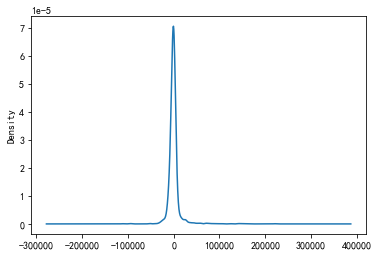

In [33]:
plt.figure()
#ols.fit().model is a method to access to the residual.
result_1_2.resid.plot.density()
plt.show()

In [34]:
stats.kstest(result_1_2.resid, 'norm', (result_1_2.resid.mean(), result_1_2.resid.std()))

KstestResult(statistic=0.24467088534349823, pvalue=3.2473314331643444e-99)

<AxesSubplot:>

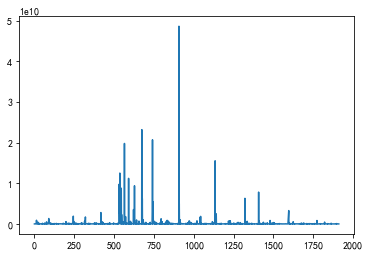

In [35]:
np.square(result_1_2.resid).plot()

#### Simple OLS Model for Model_1_2

In [36]:
Pooledmod_1_2 = pnd.PooledOLS(panel.sale_1stWeek, panel[variables+dummies])
Pooled_res_1_2 = Pooledmod_1_2.fit(cov_type='robust')
print(Pooled_res_1_2)

                          PooledOLS Estimation Summary                          
Dep. Variable:           sale_1stWeek   R-squared:                        0.4797
Estimator:                  PooledOLS   R-squared (Between):              0.4797
No. Observations:                1873   R-squared (Within):               0.0000
Date:                Sun, May 29 2022   R-squared (Overall):              0.4797
Time:                        20:51:25   Log-likelihood                -2.053e+04
Cov. Estimator:                Robust                                           
                                        F-statistic:                      60.745
Entities:                        1873   P-value                           0.0000
Avg Obs:                       1.0000   Distribution:                 F(28,1845)
Min Obs:                       1.0000                                           
Max Obs:                       1.0000   F-statistic (robust):             30.400
                            

#### Fixed Effect Model for Model_1_2

In [37]:
FEmod_1_2 = pnd.PanelOLS(panel.sale_1stWeek, panel[variables+dummies], time_effects=True,drop_absorbed=True)
FEmod_1_2 = FEmod_1_2.fit(cov_type='clustered')
print(FEmod_1_2)

                          PanelOLS Estimation Summary                           
Dep. Variable:           sale_1stWeek   R-squared:                        0.3326
Estimator:                   PanelOLS   R-squared (Between):              0.3594
No. Observations:                1873   R-squared (Within):               0.0000
Date:                Sun, May 29 2022   R-squared (Overall):              0.3594
Time:                        20:51:26   Log-likelihood                 -1.98e+04
Cov. Estimator:             Clustered                                           
                                        F-statistic:                      18.597
Entities:                        1873   P-value                           0.0000
Avg Obs:                       1.0000   Distribution:                 F(28,1045)
Min Obs:                       1.0000                                           
Max Obs:                       1.0000   F-statistic (robust):             9.9397
                            

In [38]:
#REmod_1_2 = pnd.RandomEffects(panel.sale_1stWeek, panel[variables+dummies])
#re_res = REmod_1_2.fit(cov_type = 'robust')
#print(re_res)

#### sub_model 3 for y = sale_cum

In [39]:
formula = 'sale_cum~' + independent
result_1_3 = ols(formula,data).fit()
result_1_3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               sale_cum   R-squared:                       0.486
Model:                            OLS   Adj. R-squared:                  0.478
Method:                 Least Squares   F-statistic:                     64.56
Date:                Sun, 29 May 2022   Prob (F-statistic):          3.00e-243
Time:                        20:51:26   Log-Likelihood:                -21977.
No. Observations:                1873   AIC:                         4.401e+04
Df Residuals:                    1845   BIC:                         4.417e+04
Df Model:                          27                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept           -1.946e+04   3953.250     -4.921      0.000   -2.72e+04   -1.17e+04
num_photo              69.6355      4.469     15.581      0.000      60.870      78.401
announce_value_mean -6.663e-06    5.2e-06     -1.281      0.200   -1.69e-05    3.54e-06
story_length           -7.4084      5.007     -1.480      0.139     -17.228       2.411
comment_length         39.9696     11.906      3.357      0.001      16.619      63.320
comment_likes          11.4583      0.493     23.224      0.000      10.491      12.426
director_num         2644.7382   1042.296      2.537      0.011     600.535    4688.941
actor_num_new         -67.5861     31.344     -2.156      0.031    -129.060      -6.112
ver_bin              5047.3195   2158.578      2.338      0.019     813.807    9280.832
flim_冒险              1470.7984   2201.933      0.668      0.504   -2847.743    5789.340
flim_剧情             -2141.1733   1803.746     -1.187      0.235   -5678.772    1396.425
flim_动作              1990.6350   2080.832      0.957      0.339   -2090.399    6071.669
flim_动画             -5609.9193   2540.264     -2.208      0.027   -1.06e+04    -627.825
flim_喜剧              6907.6877   1722.797      4.010      0.000    3528.851    1.03e+04
flim_奇幻             -1367.2984   2401.774     -0.569      0.569   -6077.779    3343.183
flim_家庭              -360.1812   2667.776     -0.135      0.893   -5592.358    4871.995
flim_悬疑              -634.3211   2518.029     -0.252      0.801   -5572.808    4304.166
flim_惊悚              7151.4316   2828.559      2.528      0.012    1603.920    1.27e+04
flim_爱情             -5015.9354   1989.147     -2.522      0.012   -8917.152   -1114.719
flim_犯罪               657.1685   2575.247      0.255      0.799   -4393.536    5707.873
flim_科幻             -1827.8578   2868.585     -0.637      0.524   -7453.872    3798.156
country_大陆           7535.4376   2199.709      3.426      0.001    3221.256    1.18e+04
country_香港           5593.2029   3858.169      1.450      0.147   -1973.633    1.32e+04
country_台湾             44.1485   5503.781      0.008      0.994   -1.08e+04    1.08e+04
country_日本           1315.1145   3917.299      0.336      0.737   -6367.690    8997.919
country_美国          -7709.6404   2848.124     -2.707      0.007   -1.33e+04   -2123.756
story_symbol        -2110.2914   2249.310     -0.938      0.348   -6521.751    2301.168
reward_dummy         2880.0828   1732.218      1.663      0.097    -517.230    6277.396
==============================================================================
Omnibus:                     1974.283   Durbin-Watson:                   1.914
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           240379.692
Skew:                           4.913   Prob(JB):                         0.00
Kurtosis:                      57.622  

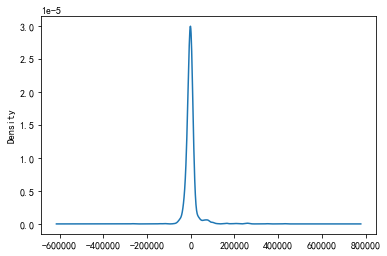

In [40]:
plt.figure()
#ols.fit().model is a method to access to the residual.
result_1_3.resid.plot.density()
plt.show()

In [41]:
stats.kstest(result_1_3.resid, 'norm', (result_1_3.resid.mean(), result_1_3.resid.std()))

KstestResult(statistic=0.23543520624664405, pvalue=8.336198060417533e-92)

<AxesSubplot:>

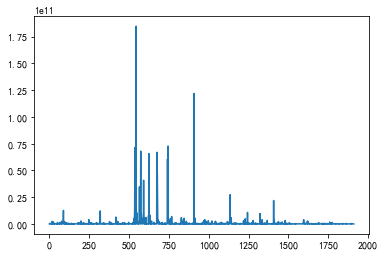

In [42]:
np.square(result_1_3.resid).plot()

#### Simple OLS Model for Model_1_3

In [43]:
Pooledmod_1_3 = pnd.PooledOLS(panel.sale_cum, panel[variables+dummies])
Pooled_res_1_3 = Pooledmod_1_3.fit(cov_type='robust')
print(Pooled_res_1_3)

                          PooledOLS Estimation Summary                          
Dep. Variable:               sale_cum   R-squared:                        0.5565
Estimator:                  PooledOLS   R-squared (Between):              0.5565
No. Observations:                1873   R-squared (Within):               0.0000
Date:                Sun, May 29 2022   R-squared (Overall):              0.5565
Time:                        20:51:27   Log-likelihood                -2.199e+04
Cov. Estimator:                Robust                                           
                                        F-statistic:                      82.669
Entities:                        1873   P-value                           0.0000
Avg Obs:                       1.0000   Distribution:                 F(28,1845)
Min Obs:                       1.0000                                           
Max Obs:                       1.0000   F-statistic (robust):             34.483
                            

#### Fixed Effect Model for Model_1_3

In [44]:
FEmod_1_3 = pnd.PanelOLS(panel.sale_cum, panel[variables+dummies], time_effects=True,drop_absorbed=True)
FEmod_1_3 = FEmod_1_3.fit(cov_type='clustered')
print(FEmod_1_3)

                          PanelOLS Estimation Summary                           
Dep. Variable:               sale_cum   R-squared:                        0.4156
Estimator:                   PanelOLS   R-squared (Between):              0.2646
No. Observations:                1873   R-squared (Within):               0.0000
Date:                Sun, May 29 2022   R-squared (Overall):              0.2646
Time:                        20:51:27   Log-likelihood                -2.134e+04
Cov. Estimator:             Clustered                                           
                                        F-statistic:                      26.537
Entities:                        1873   P-value                           0.0000
Avg Obs:                       1.0000   Distribution:                 F(28,1045)
Min Obs:                       1.0000                                           
Max Obs:                       1.0000   F-statistic (robust):             10.687
                            

In [45]:
#REmod_1_3 = pnd.RandomEffects(panel.sale_cum, panel[variables+dummies])
#re_res = REmod_1_3.fit(cov_type = 'robust')
#print(re_res)

### Model 2 sets -> OLS with partial transformation in variables

In [46]:
data = data.replace([np.inf,-np.inf],0)
data.time=pd.to_datetime(data.time)
panel = data.set_index(['id','time'])

In [47]:
checkVIF(data[log_1_list+log_2+dummies+['const']])

166.51767885232962


,feature,VIF
0,log_num_photo,3.031643
1,log_announce_value_mean,1.047920
2,log_comment_likes,1.739414
3,log_director_num,1.130996
4,log_actor_num_new,1.785193
5,story_length,1.110151
6,comment_length,1.633157
7,range_min,2.081665
8,ver_bin,1.638504
9,flim_冒险,1.729647


In [48]:
var_str = ''
for i in log_1_list:
    var_str = var_str + i + '+'
for i in log_2:
    var_str = var_str + i + '+'
var_str = var_str[:-1]
dum_str = ''
for i in dummies:
    dum_str = dum_str + i + '+'
dum_str = dum_str[:-1]
independent = var_str + '+' + dum_str
independent

'log_num_photo+log_announce_value_mean+log_comment_likes+log_director_num+log_actor_num_new+story_length+comment_length+range_min+ver_bin+flim_冒险+flim_剧情+flim_动作+flim_动画+flim_喜剧+flim_奇幻+flim_家庭+flim_悬疑+flim_惊悚+flim_爱情+flim_犯罪+flim_科幻+country_大陆+country_香港+country_台湾+country_日本+country_美国+story_symbol+reward_dummy'

#### sub_model 1 for y = Score

In [49]:
formula = 'Score~' + independent
result_2_1 = ols(formula,data).fit()
result_2_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Score   R-squared:                       0.473
Model:                            OLS   Adj. R-squared:                  0.465
Method:                 Least Squares   F-statistic:                     59.00
Date:                Sun, 29 May 2022   Prob (F-statistic):          2.73e-232
Time:                        20:51:28   Log-Likelihood:                -2430.5
No. Observations:                1873   AIC:                             4919.
Df Residuals:                    1844   BIC:                             5079.
Df Model:                          28                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                   5.6939      0.266     21.391      0.000       5.172       6.216
log_num_photo               0.1751      0.042      4.132      0.000       0.092       0.258
log_announce_value_mean     0.0107      0.008      1.387      0.166      -0.004       0.026
log_comment_likes           0.1106      0.012      9.420      0.000       0.088       0.134
log_director_num           -0.0670      0.062     -1.078      0.281      -0.189       0.055
log_actor_num_new          -0.0187      0.025     -0.741      0.459      -0.068       0.031
story_length             5.973e-05      0.000      0.404      0.687      -0.000       0.000
comment_length              0.0022      0.000      5.721      0.000       0.001       0.003
range_min                   0.0075      0.002      4.291      0.000       0.004       0.011
ver_bin                    -0.1262      0.063     -2.009      0.045      -0.249      -0.003
flim_冒险                    -0.0198      0.064     -0.308      0.758      -0.146       0.106
flim_剧情                     0.0372      0.053      0.696      0.486      -0.068       0.142
flim_动作                    -0.1685      0.062     -2.726      0.006      -0.290      -0.047
flim_动画                     0.7582      0.077      9.785      0.000       0.606       0.910
flim_喜剧                    -0.0098      0.051     -0.191      0.848      -0.110       0.091
flim_奇幻                    -0.2784      0.071     -3.938      0.000      -0.417      -0.140
flim_家庭                     0.1674      0.079      2.132      0.033       0.013       0.321
flim_悬疑                    -0.4209      0.074     -5.680      0.000      -0.566      -0.276
flim_惊悚                    -1.0488      0.084    -12.553      0.000      -1.213      -0.885
flim_爱情                    -0.2019      0.059     -3.450      0.001      -0.317      -0.087
flim_犯罪                     0.2163      0.076      2.846      0.004       0.067       0.365
flim_科幻                    -0.2421      0.083     -2.913      0.004      -0.405      -0.079
country_大陆                 -0.4992      0.066     -7.611      0.000      -0.628      -0.371
country_香港                 -0.1170      0.114     -1.030      0.303      -0.340       0.106
country_台湾                 -0.2709      0.162     -1.675      0.094      -0.588       0.046
country_日本                 -0.3779      0.116     -3.268      0.001      -0.605      -0.151
country_美国                 -0.0976      0.083     -1.182      0.238      -0.259       0.064
story_symbol               -0.0640      0.066     -0.968      0.333      -0.194       0.066
reward_dummy                0.1974      0.051      3.846      0.000       0.097       0.298
==============================================================================
Omnibus:                      404.627   Durbin-Watson:      

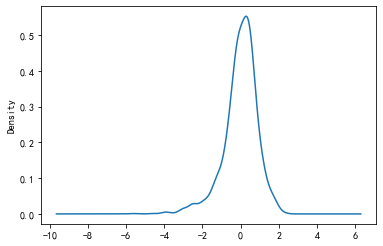

In [50]:
plt.figure()
#ols.fit().model is a method to access to the residual.
result_2_1.resid.plot.density()
plt.show()

In [51]:
stats.kstest(result_2_1.resid, 'norm', (result_2_1.resid.mean(), result_2_1.resid.std()))

KstestResult(statistic=0.08029268911889481, pvalue=5.965295471098184e-11)

<AxesSubplot:>

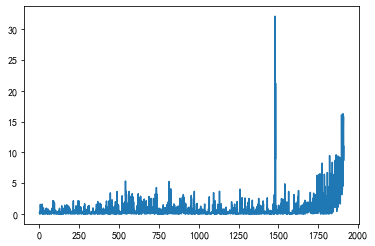

In [52]:
np.square(result_2_1.resid).plot()

#### Simple OLS Model for Model_2_1

In [53]:
Pooledmod_2_1 = pnd.PooledOLS(panel.Score, panel[log_1_list+log_2+dummies])
Pooled_res_2_1 = Pooledmod_2_1.fit(cov_type='robust')
print(Pooled_res_2_1)

                          PooledOLS Estimation Summary                          
Dep. Variable:                  Score   R-squared:                        0.9845
Estimator:                  PooledOLS   R-squared (Between):              0.9845
No. Observations:                1873   R-squared (Within):               0.0000
Date:                Sun, May 29 2022   R-squared (Overall):              0.9845
Time:                        20:51:29   Log-likelihood                   -2638.1
Cov. Estimator:                Robust                                           
                                        F-statistic:                      4195.1
Entities:                        1873   P-value                           0.0000
Avg Obs:                       1.0000   Distribution:                 F(28,1845)
Min Obs:                       1.0000                                           
Max Obs:                       1.0000   F-statistic (robust):             5858.8
                            

#### Fixed Effect Model for Model_2_1

In [54]:
FEmod_2_1 = pnd.PanelOLS(panel.Score, panel[log_1_list+log_2+dummies], time_effects=True,drop_absorbed=True)
FEmod_2_1 = FEmod_2_1.fit(cov_type='clustered')
print(FEmod_2_1)

                          PanelOLS Estimation Summary                           
Dep. Variable:                  Score   R-squared:                        0.4869
Estimator:                   PanelOLS   R-squared (Between):              0.5923
No. Observations:                1873   R-squared (Within):               0.0000
Date:                Sun, May 29 2022   R-squared (Overall):              0.5923
Time:                        20:51:30   Log-likelihood                   -1807.9
Cov. Estimator:             Clustered                                           
                                        F-statistic:                      35.409
Entities:                        1873   P-value                           0.0000
Avg Obs:                       1.0000   Distribution:                 F(28,1045)
Min Obs:                       1.0000                                           
Max Obs:                       1.0000   F-statistic (robust):             22.765
                            

#### Random Effect Model for Model_2_1

In [55]:
#Random Effect Model is almost unavailable
#REmod_1_1 = pnd.RandomEffects(panel.Score, panel[log_1_list+log_2+dummies])
#re_res = REmod_1_1.fit(cov_type = 'robust')
#print(re_res)

#### sub_model 2 for y = sale_1stWeek

In [56]:
formula = 'sale_1stWeek~' + independent
result_2_2 = ols(formula,data).fit()
result_2_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           sale_1stWeek   R-squared:                       0.326
Model:                            OLS   Adj. R-squared:                  0.315
Method:                 Least Squares   F-statistic:                     31.81
Date:                Sun, 29 May 2022   Prob (F-statistic):          4.55e-136
Time:                        20:51:30   Log-Likelihood:                -20634.
No. Observations:                1873   AIC:                         4.133e+04
Df Residuals:                    1844   BIC:                         4.149e+04
Df Model:                          28                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept               -4.881e+04   4427.211    -11.026      0.000   -5.75e+04   -4.01e+04
log_num_photo            5102.4287    704.722      7.240      0.000    3720.291    6484.566
log_announce_value_mean    74.5167    128.236      0.581      0.561    -176.986     326.019
log_comment_likes        2394.3556    195.253     12.263      0.000    2011.416    2777.295
log_director_num         4089.1239   1032.811      3.959      0.000    2063.523    6114.725
log_actor_num_new         -63.8548    420.854     -0.152      0.879    -889.255     761.546
story_length               -2.4941      2.461     -1.013      0.311      -7.321       2.333
comment_length            -26.8346      6.493     -4.133      0.000     -39.569     -14.101
range_min                 172.5476     29.009      5.948      0.000     115.654     229.441
ver_bin                  3819.9200   1045.080      3.655      0.000    1770.256    5869.584
flim_冒险                  1035.5339   1071.131      0.967      0.334   -1065.224    3136.291
flim_剧情                 -1769.3585    888.828     -1.991      0.047   -3512.573     -26.144
flim_动作                  1247.5865   1027.949      1.214      0.225    -768.480    3263.653
flim_动画                 -2659.2143   1288.865     -2.063      0.039   -5187.003    -131.426
flim_喜剧                  2169.4948    852.173      2.546      0.011     498.170    3840.820
flim_奇幻                   162.4286   1175.860      0.138      0.890   -2143.729    2468.586
flim_家庭                   858.4693   1305.881      0.657      0.511   -1702.691    3419.630
flim_悬疑                  -361.9330   1232.439     -0.294      0.769   -2779.055    2055.189
flim_惊悚                  4124.3896   1389.697      2.968      0.003    1398.845    6849.934
flim_爱情                  -873.0806    973.403     -0.897      0.370   -2782.168    1036.007
flim_犯罪                 -1573.1809   1263.790     -1.245      0.213   -4051.790     905.428
flim_科幻                  3121.6856   1382.468      2.258      0.024     410.318    5833.053
country_大陆               5092.5660   1090.803      4.669      0.000    2953.226    7231.906
country_香港               1434.1634   1888.357      0.759      0.448   -2269.380    5137.707
country_台湾               2905.0158   2689.851      1.080      0.280   -2370.457    8180.489
country_日本                 67.9484   1923.377      0.035      0.972   -3704.277    3840.174
country_美国              -1040.5265   1373.226     -0.758      0.449   -3733.768    1652.715
story_symbol            -1948.6707   1099.174     -1.773      0.076   -4104.428     207.087
reward_dummy             1096.9446    853.598      1.285      0.199    -577.176    2771.065
==============================================================================
Omnibus:                     2302.744   Durbin-Watson:      

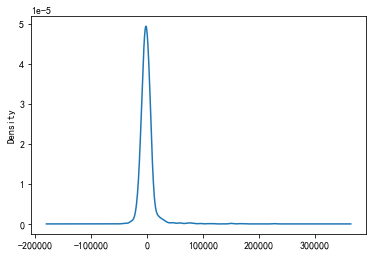

In [57]:
plt.figure()
#ols.fit().model is a method to access to the residual.
result_2_2.resid.plot.density()
plt.show()

In [58]:
stats.kstest(result_2_2.resid, 'norm', (result_2_2.resid.mean(), result_2_2.resid.std()))

KstestResult(statistic=0.19135702530835508, pvalue=1.5343261360313598e-60)

<AxesSubplot:>

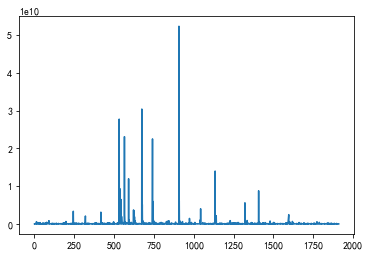

In [59]:
np.square(result_2_2.resid).plot()

#### Simple OLS Model for Model_2_2

In [60]:
Pooledmod_2_2 = pnd.PooledOLS(panel.sale_1stWeek, panel[variables+dummies])
Pooled_res_2_2 = Pooledmod_2_2.fit(cov_type='robust')
print(Pooled_res_2_2)

                          PooledOLS Estimation Summary                          
Dep. Variable:           sale_1stWeek   R-squared:                        0.4797
Estimator:                  PooledOLS   R-squared (Between):              0.4797
No. Observations:                1873   R-squared (Within):               0.0000
Date:                Sun, May 29 2022   R-squared (Overall):              0.4797
Time:                        20:51:31   Log-likelihood                -2.053e+04
Cov. Estimator:                Robust                                           
                                        F-statistic:                      60.745
Entities:                        1873   P-value                           0.0000
Avg Obs:                       1.0000   Distribution:                 F(28,1845)
Min Obs:                       1.0000                                           
Max Obs:                       1.0000   F-statistic (robust):             30.400
                            

#### Fixed Effect Model for Model_2_2

In [61]:
FEmod_2_2 = pnd.PanelOLS(panel.sale_1stWeek, panel[log_1_list+log_2+dummies], time_effects=True,drop_absorbed=True)
FEmod_2_2 = FEmod_2_2.fit(cov_type='clustered')
print(FEmod_2_2)

                          PanelOLS Estimation Summary                           
Dep. Variable:           sale_1stWeek   R-squared:                        0.2961
Estimator:                   PanelOLS   R-squared (Between):             -3.6466
No. Observations:                1873   R-squared (Within):               0.0000
Date:                Sun, May 29 2022   R-squared (Overall):             -3.6466
Time:                        20:51:31   Log-likelihood                -1.985e+04
Cov. Estimator:             Clustered                                           
                                        F-statistic:                      15.701
Entities:                        1873   P-value                           0.0000
Avg Obs:                       1.0000   Distribution:                 F(28,1045)
Min Obs:                       1.0000                                           
Max Obs:                       1.0000   F-statistic (robust):             10.329
                            

#### Random Effect Model for Model_2_2

In [62]:
#Random Effect Model is almost unavailable
#REmod_1_1 = pnd.RandomEffects(panel.sale_1stWeek, panel[log_1_list+log_2+dummies])
#re_res = REmod_1_1.fit(cov_type = 'robust')
#print(re_res)

#### sub_model 3 for y = sale_cum

In [63]:
formula = 'sale_cum~' + independent
result_2_3 = ols(formula,data).fit()
result_2_3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               sale_cum   R-squared:                       0.371
Model:                            OLS   Adj. R-squared:                  0.361
Method:                 Least Squares   F-statistic:                     38.80
Date:                Sun, 29 May 2022   Prob (F-statistic):          5.28e-163
Time:                        20:51:31   Log-Likelihood:                -22166.
No. Observations:                1873   AIC:                         4.439e+04
Df Residuals:                    1844   BIC:                         4.455e+04
Df Model:                          28                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept               -1.281e+05      1e+04    -12.772      0.000   -1.48e+05   -1.08e+05
log_num_photo            1.069e+04   1596.575      6.695      0.000    7557.463    1.38e+04
log_announce_value_mean   365.6511    290.523      1.259      0.208    -204.137     935.439
log_comment_likes        6389.4848    442.352     14.444      0.000    5521.920    7257.049
log_director_num         7720.2805   2339.871      3.299      0.001    3131.204    1.23e+04
log_actor_num_new         601.3151    953.461      0.631      0.528   -1268.661    2471.291
story_length               -4.9926      5.576     -0.895      0.371     -15.929       5.943
comment_length            -60.1365     14.710     -4.088      0.000     -88.986     -31.287
range_min                 512.1470     65.720      7.793      0.000     383.253     641.041
ver_bin                  7755.4995   2367.667      3.276      0.001    3111.909    1.24e+04
flim_冒险                  2459.2358   2426.688      1.013      0.311   -2300.110    7218.581
flim_剧情                 -5172.2321   2013.673     -2.569      0.010   -9121.550   -1222.914
flim_动作                  1662.7546   2328.857      0.714      0.475   -2904.720    6230.229
flim_动画                 -2840.6246   2919.973     -0.973      0.331   -8567.425    2886.176
flim_喜剧                  5815.8858   1930.629      3.012      0.003    2029.436    9602.335
flim_奇幻                 -3329.9222   2663.956     -1.250      0.211   -8554.610    1894.765
flim_家庭                  1136.9490   2958.523      0.384      0.701   -4665.457    6939.355
flim_悬疑                 -2682.6300   2792.136     -0.961      0.337   -8158.711    2793.451
flim_惊悚                  1.036e+04   3148.410      3.290      0.001    4181.898    1.65e+04
flim_爱情                 -5016.4366   2205.281     -2.275      0.023   -9341.546    -691.327
flim_犯罪                 -4112.8344   2863.163     -1.436      0.151   -9728.216    1502.548
flim_科幻                  4614.6091   3132.034      1.473      0.141   -1528.096    1.08e+04
country_大陆                1.49e+04   2471.256      6.030      0.000    1.01e+04    1.97e+04
country_香港               8238.1057   4278.145      1.926      0.054    -152.412    1.66e+04
country_台湾               6634.9256   6093.958      1.089      0.276   -5316.858    1.86e+04
country_日本              -4395.5133   4357.483     -1.009      0.313   -1.29e+04    4150.607
country_美国              -4419.9930   3111.095     -1.421      0.156   -1.05e+04    1681.646
story_symbol            -3693.4167   2490.221     -1.483      0.138   -8577.366    1190.533
reward_dummy             5947.6908   1933.859      3.076      0.002    2154.907    9740.474
==============================================================================
Omnibus:                     1993.765   Durbin-Watson:      

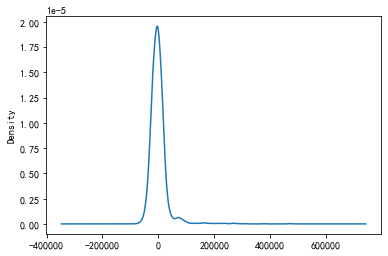

In [64]:
plt.figure()
#ols.fit().model is a method to access to the residual.
result_2_3.resid.plot.density()
plt.show()

In [65]:
stats.kstest(result_2_3.resid, 'norm', (result_2_3.resid.mean(), result_2_3.resid.std()))

KstestResult(statistic=0.16640949628521418, pvalue=8.414887178269865e-46)

<AxesSubplot:>

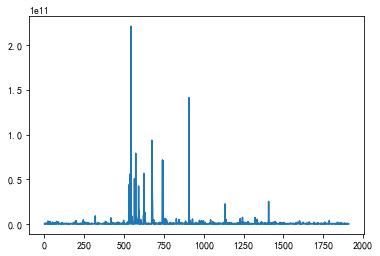

In [66]:
np.square(result_2_3.resid).plot()

#### Simple OLS Model for Model_2_3

In [67]:
Pooledmod_2_3 = pnd.PooledOLS(panel.sale_cum, panel[log_1_list+log_2+dummies])
Pooled_res_2_3 = Pooledmod_2_3.fit(cov_type='robust')
print(Pooled_res_2_3)

                          PooledOLS Estimation Summary                          
Dep. Variable:               sale_cum   R-squared:                        0.4159
Estimator:                  PooledOLS   R-squared (Between):              0.4159
No. Observations:                1873   R-squared (Within):               0.0000
Date:                Sun, May 29 2022   R-squared (Overall):              0.4159
Time:                        20:51:32   Log-likelihood                -2.225e+04
Cov. Estimator:                Robust                                           
                                        F-statistic:                      46.924
Entities:                        1873   P-value                           0.0000
Avg Obs:                       1.0000   Distribution:                 F(28,1845)
Min Obs:                       1.0000                                           
Max Obs:                       1.0000   F-statistic (robust):             25.778
                            

#### Fixed Effect Model for Model_2_3

In [68]:
FEmod_2_3 = pnd.PanelOLS(panel.sale_cum, panel[log_1_list+log_2+dummies], time_effects=True,drop_absorbed=True)
FEmod_2_3 = FEmod_2_3.fit(cov_type='clustered')
print(FEmod_2_3)

                          PanelOLS Estimation Summary                           
Dep. Variable:               sale_cum   R-squared:                        0.3224
Estimator:                   PanelOLS   R-squared (Between):             -4.7231
No. Observations:                1873   R-squared (Within):               0.0000
Date:                Sun, May 29 2022   R-squared (Overall):             -4.7231
Time:                        20:51:33   Log-likelihood                -2.148e+04
Cov. Estimator:             Clustered                                           
                                        F-statistic:                      17.758
Entities:                        1873   P-value                           0.0000
Avg Obs:                       1.0000   Distribution:                 F(28,1045)
Min Obs:                       1.0000                                           
Max Obs:                       1.0000   F-statistic (robust):             11.083
                            

#### Random Effect Model for Model_2_3

In [69]:
#Random Effect Model is almost unavailable
#REmod_1_1 = pnd.RandomEffects(panel.sale_cum, panel[log_1_list+log_2+dummies])
#re_res = REmod_1_1.fit(cov_type = 'robust')
#print(re_res)

### Model 3 sets -> OLS with fully transformation in variables

In [70]:
checkVIF(data[log_1_list+log_2_list+dummies+['const']])

1880.9767604053932


,feature,VIF
0,log_num_photo,3.108528
1,log_announce_value_mean,1.051912
2,log_comment_likes,1.844414
3,log_director_num,1.131888
4,log_actor_num_new,1.785372
5,log_story_length,1.142941
6,log_comment_length,1.823125
7,log_range_min,2.083161
8,ver_bin,1.640414
9,flim_冒险,1.728942


In [71]:
var_str = ''
for i in log_1_list:
    var_str = var_str + i + '+'
for i in log_2_list:
    var_str = var_str + i + '+'
var_str = var_str[:-1]
dum_str = ''
for i in dummies:
    dum_str = dum_str + i + '+'
dum_str = dum_str[:-1]
independent = var_str + '+' + dum_str
independent

'log_num_photo+log_announce_value_mean+log_comment_likes+log_director_num+log_actor_num_new+log_story_length+log_comment_length+log_range_min+ver_bin+flim_冒险+flim_剧情+flim_动作+flim_动画+flim_喜剧+flim_奇幻+flim_家庭+flim_悬疑+flim_惊悚+flim_爱情+flim_犯罪+flim_科幻+country_大陆+country_香港+country_台湾+country_日本+country_美国+story_symbol+reward_dummy'

#### sub_model 1 for y = Score

In [72]:
formula = 'Score~' + independent
result_3_1 = ols(formula,data).fit()
result_3_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Score   R-squared:                       0.478
Model:                            OLS   Adj. R-squared:                  0.470
Method:                 Least Squares   F-statistic:                     60.30
Date:                Sun, 29 May 2022   Prob (F-statistic):          2.13e-236
Time:                        20:51:33   Log-Likelihood:                -2420.7
No. Observations:                1873   AIC:                             4899.
Df Residuals:                    1844   BIC:                             5060.
Df Model:                          28                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                   1.0790      0.890      1.212      0.226      -0.666       2.824
log_num_photo               0.1572      0.043      3.684      0.000       0.074       0.241
log_announce_value_mean     0.0082      0.008      1.061      0.289      -0.007       0.023
log_comment_likes           0.0979      0.012      8.140      0.000       0.074       0.121
log_director_num           -0.0628      0.062     -1.017      0.309      -0.184       0.058
log_actor_num_new          -0.0150      0.025     -0.595      0.552      -0.064       0.034
log_story_length           -0.0114      0.047     -0.242      0.809      -0.104       0.081
log_comment_length          0.4077      0.058      7.021      0.000       0.294       0.522
log_range_min               0.8549      0.185      4.616      0.000       0.492       1.218
ver_bin                    -0.1301      0.063     -2.080      0.038      -0.253      -0.007
flim_冒险                    -0.0135      0.064     -0.210      0.833      -0.139       0.112
flim_剧情                     0.0286      0.053      0.538      0.590      -0.076       0.133
flim_动作                    -0.1663      0.061     -2.705      0.007      -0.287      -0.046
flim_动画                     0.7704      0.077      9.962      0.000       0.619       0.922
flim_喜剧                    -0.0184      0.051     -0.361      0.718      -0.118       0.081
flim_奇幻                    -0.2844      0.070     -4.043      0.000      -0.422      -0.146
flim_家庭                     0.1574      0.078      2.012      0.044       0.004       0.311
flim_悬疑                    -0.4228      0.074     -5.735      0.000      -0.567      -0.278
flim_惊悚                    -1.0363      0.083    -12.463      0.000      -1.199      -0.873
flim_爱情                    -0.2046      0.058     -3.510      0.000      -0.319      -0.090
flim_犯罪                     0.1929      0.076      2.552      0.011       0.045       0.341
flim_科幻                    -0.2419      0.083     -2.925      0.003      -0.404      -0.080
country_大陆                 -0.4697      0.066     -7.162      0.000      -0.598      -0.341
country_香港                 -0.0956      0.113     -0.845      0.398      -0.317       0.126
country_台湾                 -0.2381      0.161     -1.478      0.140      -0.554       0.078
country_日本                 -0.3825      0.115     -3.322      0.001      -0.608      -0.157
country_美国                 -0.0782      0.082     -0.951      0.342      -0.240       0.083
story_symbol               -0.0594      0.066     -0.904      0.366      -0.188       0.070
reward_dummy                0.1928      0.051      3.780      0.000       0.093       0.293
==============================================================================
Omnibus:                      398.773   Durbin-Watson:      

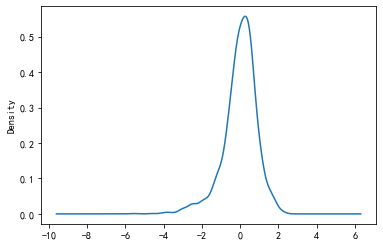

In [73]:
plt.figure()
#ols.fit().model is a method to access to the residual.
result_3_1.resid.plot.density()
plt.show()

In [74]:
stats.kstest(result_3_1.resid, 'norm', (result_3_1.resid.mean(), result_3_1.resid.std()))

KstestResult(statistic=0.0784588552420365, pvalue=1.7826357848250905e-10)

<AxesSubplot:>

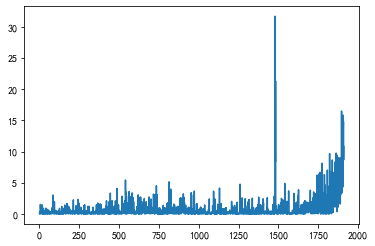

In [75]:
np.square(result_3_1.resid).plot()

#### Simple OLS Model for Model_3_1

In [76]:
Pooledmod_3_1 = pnd.PooledOLS(panel.Score, panel[log_1_list+log_2_list+dummies])
Pooled_res_3_1 = Pooledmod_3_1.fit(cov_type='robust')
print(Pooled_res_3_1)

                          PooledOLS Estimation Summary                          
Dep. Variable:                  Score   R-squared:                        0.9877
Estimator:                  PooledOLS   R-squared (Between):              0.9877
No. Observations:                1873   R-squared (Within):               0.0000
Date:                Sun, May 29 2022   R-squared (Overall):              0.9877
Time:                        20:51:34   Log-likelihood                   -2421.5
Cov. Estimator:                Robust                                           
                                        F-statistic:                      5303.9
Entities:                        1873   P-value                           0.0000
Avg Obs:                       1.0000   Distribution:                 F(28,1845)
Min Obs:                       1.0000                                           
Max Obs:                       1.0000   F-statistic (robust):             7919.6
                            

#### Fixed Effect Model for Model_3_1

In [77]:
FEmod_3_1 = pnd.PanelOLS(panel.Score, panel[log_1_list+log_2_list+dummies], time_effects=True,drop_absorbed=True)
FEmod_3_1 = FEmod_3_1.fit(cov_type='clustered')
print(FEmod_3_1)

                          PanelOLS Estimation Summary                           
Dep. Variable:                  Score   R-squared:                        0.4940
Estimator:                   PanelOLS   R-squared (Between):              0.9874
No. Observations:                1873   R-squared (Within):               0.0000
Date:                Sun, May 29 2022   R-squared (Overall):              0.9874
Time:                        20:51:34   Log-likelihood                   -1794.7
Cov. Estimator:             Clustered                                           
                                        F-statistic:                      36.439
Entities:                        1873   P-value                           0.0000
Avg Obs:                       1.0000   Distribution:                 F(28,1045)
Min Obs:                       1.0000                                           
Max Obs:                       1.0000   F-statistic (robust):             23.300
                            

#### Random Effect Model for Model_3_1

In [78]:
#Random Effect Model is almost unavailable
#REmod_1_1 = pnd.RandomEffects(panel.Score, panel[log_1_list+log_2_list+dummies])
#re_res = REmod_1_1.fit(cov_type = 'robust')
#print(re_res)

#### sub_model 2 for y = sale_1stWeek

In [79]:
formula = 'sale_1stWeek~' + independent
result_3_2 = ols(formula,data).fit()
result_3_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           sale_1stWeek   R-squared:                       0.326
Model:                            OLS   Adj. R-squared:                  0.316
Method:                 Least Squares   F-statistic:                     31.83
Date:                Sun, 29 May 2022   Prob (F-statistic):          3.99e-136
Time:                        20:51:34   Log-Likelihood:                -20634.
No. Observations:                1873   AIC:                         4.133e+04
Df Residuals:                    1844   BIC:                         4.149e+04
Df Model:                          28                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept               -7.977e+04   1.49e+04     -5.361      0.000   -1.09e+05   -5.06e+04
log_num_photo            5563.9042    713.551      7.797      0.000    4164.452    6963.357
log_announce_value_mean    92.6951    128.470      0.722      0.471    -159.268     344.658
log_comment_likes        2577.0862    201.045     12.818      0.000    2182.786    2971.386
log_director_num         4087.3496   1033.143      3.956      0.000    2061.097    6113.603
log_actor_num_new         -62.8839    420.845     -0.149      0.881    -888.266     762.498
log_story_length         -677.9602    786.926     -0.862      0.389   -2221.320     865.400
log_comment_length      -5121.6112    970.809     -5.276      0.000   -7025.612   -3217.610
log_range_min            1.509e+04   3096.229      4.874      0.000    9019.802    2.12e+04
ver_bin                  3894.8045   1045.613      3.725      0.000    1844.095    5945.514
flim_冒险                  1078.2245   1070.835      1.007      0.314   -1021.953    3178.402
flim_剧情                 -1581.6094    889.330     -1.778      0.075   -3325.809     162.590
flim_动作                  1187.8364   1027.711      1.156      0.248    -827.763    3203.436
flim_动画                 -3088.3314   1292.844     -2.389      0.017   -5623.923    -552.740
flim_喜剧                  2050.5757    850.448      2.411      0.016     382.633    3718.518
flim_奇幻                   197.6298   1175.955      0.168      0.867   -2108.713    2503.972
flim_家庭                  1038.5882   1307.626      0.794      0.427   -1525.995    3603.172
flim_悬疑                  -354.0822   1232.659     -0.287      0.774   -2771.636    2063.472
flim_惊悚                  3930.2412   1390.117      2.827      0.005    1203.873    6656.610
flim_爱情                  -939.9516    974.474     -0.965      0.335   -2851.141     971.237
flim_犯罪                 -1472.4068   1263.713     -1.165      0.244   -3950.866    1006.053
flim_科幻                  3252.2240   1382.783      2.352      0.019     540.240    5964.208
country_大陆               4640.7887   1096.570      4.232      0.000    2490.140    6791.437
country_香港               1246.1994   1890.177      0.659      0.510   -2460.912    4953.311
country_台湾               2797.9772   2692.959      1.039      0.299   -2483.592    8079.547
country_日本                 59.9198   1924.953      0.031      0.975   -3715.397    3835.237
country_美国              -1309.9962   1375.053     -0.953      0.341   -4006.822    1386.829
story_symbol            -1910.3026   1099.707     -1.737      0.083   -4067.104     246.498
reward_dummy             1268.0116    852.744      1.487      0.137    -404.433    2940.457
==============================================================================
Omnibus:                     2310.208   Durbin-Watson:      

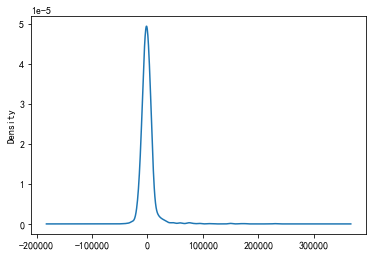

In [80]:
plt.figure()
#ols.fit().model is a method to access to the residual.
result_3_2.resid.plot.density()
plt.show()

In [81]:
stats.kstest(result_3_2.resid, 'norm', (result_3_2.resid.mean(), result_3_2.resid.std()))

KstestResult(statistic=0.18735935192487718, pvalue=4.9009766551861236e-58)

<AxesSubplot:>

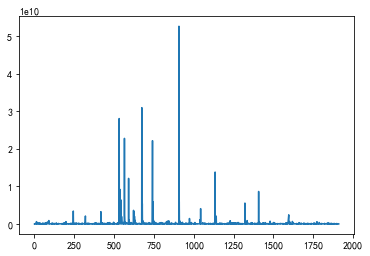

In [82]:
np.square(result_3_2.resid).plot()

#### Simple OLS Model for Model_3_2

In [83]:
Pooledmod_3_2 = pnd.PooledOLS(panel.sale_1stWeek, panel[log_1_list+log_2_list+dummies])
Pooled_res_3_2 = Pooledmod_3_2.fit(cov_type='robust')
print(Pooled_res_3_2)

                          PooledOLS Estimation Summary                          
Dep. Variable:           sale_1stWeek   R-squared:                        0.4113
Estimator:                  PooledOLS   R-squared (Between):              0.4113
No. Observations:                1873   R-squared (Within):               0.0000
Date:                Sun, May 29 2022   R-squared (Overall):              0.4113
Time:                        20:51:35   Log-likelihood                -2.065e+04
Cov. Estimator:                Robust                                           
                                        F-statistic:                      46.035
Entities:                        1873   P-value                           0.0000
Avg Obs:                       1.0000   Distribution:                 F(28,1845)
Min Obs:                       1.0000                                           
Max Obs:                       1.0000   F-statistic (robust):             26.432
                            

#### Fixed Effect Model for Model_3_2

In [84]:
FEmod_3_2 = pnd.PanelOLS(panel.sale_1stWeek, panel[log_1_list+log_2_list+dummies], time_effects=True,drop_absorbed=True)
FEmod_3_2 = FEmod_3_2.fit(cov_type='clustered')
print(FEmod_3_2)

                          PanelOLS Estimation Summary                           
Dep. Variable:           sale_1stWeek   R-squared:                        0.2973
Estimator:                   PanelOLS   R-squared (Between):             -6.6701
No. Observations:                1873   R-squared (Within):               0.0000
Date:                Sun, May 29 2022   R-squared (Overall):             -6.6701
Time:                        20:51:35   Log-likelihood                -1.985e+04
Cov. Estimator:             Clustered                                           
                                        F-statistic:                      15.790
Entities:                        1873   P-value                           0.0000
Avg Obs:                       1.0000   Distribution:                 F(28,1045)
Min Obs:                       1.0000                                           
Max Obs:                       1.0000   F-statistic (robust):             10.261
                            

#### Random Effect Model for Model_3_2

In [85]:
#Random Effect Model is almost unavailable
#REmod_1_1 = pnd.RandomEffects(panel.sale_1stWeek, panel[log_1_list+log_2_list+dummies])
#re_res = REmod_1_1.fit(cov_type = 'robust')
#print(re_res)

#### sub_model 3 for y = sale_cum

In [86]:
formula = 'sale_cum~' + independent
result_3_3 = ols(formula,data).fit()
result_3_3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               sale_cum   R-squared:                       0.371
Model:                            OLS   Adj. R-squared:                  0.361
Method:                 Least Squares   F-statistic:                     38.79
Date:                Sun, 29 May 2022   Prob (F-statistic):          5.91e-163
Time:                        20:51:36   Log-Likelihood:                -22166.
No. Observations:                1873   AIC:                         4.439e+04
Df Residuals:                    1844   BIC:                         4.455e+04
Df Model:                          28                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept               -2.381e+05   3.37e+04     -7.063      0.000   -3.04e+05   -1.72e+05
log_num_photo            1.197e+04   1616.796      7.404      0.000    8799.721    1.51e+04
log_announce_value_mean   410.7939    291.094      1.411      0.158    -160.115     981.702
log_comment_likes        6874.4716    455.537     15.091      0.000    5981.049    7767.894
log_director_num         7728.1814   2340.942      3.301      0.001    3137.006    1.23e+04
log_actor_num_new         619.9135    953.569      0.650      0.516   -1250.274    2490.101
log_story_length        -1763.7964   1783.053     -0.989      0.323   -5260.811    1733.218
log_comment_length      -1.252e+04   2199.704     -5.692      0.000   -1.68e+04   -8206.128
log_range_min            4.649e+04   7015.575      6.627      0.000    3.27e+04    6.03e+04
ver_bin                  7948.0341   2369.197      3.355      0.001    3301.444    1.26e+04
flim_冒险                  2549.4411   2426.347      1.051      0.294   -2209.235    7308.117
flim_剧情                 -4658.7299   2015.084     -2.312      0.021   -8610.815    -706.645
flim_动作                  1440.8373   2328.634      0.619      0.536   -3126.199    6007.873
flim_动画                 -3938.4699   2929.384     -1.344      0.179   -9683.728    1806.788
flim_喜剧                  5405.4192   1926.983      2.805      0.005    1626.120    9184.718
flim_奇幻                 -3249.9872   2664.531     -1.220      0.223   -8475.802    1975.828
flim_家庭                  1653.4223   2962.878      0.558      0.577   -4157.527    7464.372
flim_悬疑                 -2690.9537   2793.015     -0.963      0.335   -8168.757    2786.850
flim_惊悚                  9778.1963   3149.789      3.104      0.002    3600.668     1.6e+04
flim_爱情                 -5215.1991   2208.008     -2.362      0.018   -9545.657    -884.741
flim_犯罪                 -3936.5718   2863.379     -1.375      0.169   -9552.377    1679.233
flim_科幻                  4967.0389   3133.172      1.585      0.113   -1177.898    1.11e+04
country_大陆               1.372e+04   2484.657      5.522      0.000    8846.599    1.86e+04
country_香港               7773.9594   4282.848      1.815      0.070    -625.781    1.62e+04
country_台湾               6343.1238   6101.828      1.040      0.299   -5624.095    1.83e+04
country_日本              -4395.9208   4361.646     -1.008      0.314    -1.3e+04    4158.363
country_美国              -5136.7854   3115.658     -1.649      0.099   -1.12e+04     973.803
story_symbol            -3483.1353   2491.765     -1.398      0.162   -8370.112    1403.842
reward_dummy             6472.6949   1932.185      3.350      0.001    2683.194    1.03e+04
==============================================================================
Omnibus:                     2001.958   Durbin-Watson:      

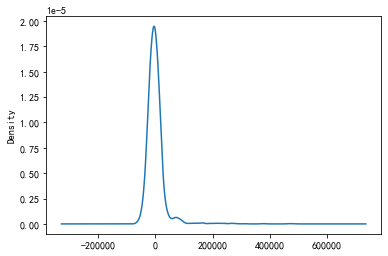

In [87]:
plt.figure()
#ols.fit().model is a method to access to the residual.
result_3_3.resid.plot.density()
plt.show()

In [88]:
stats.kstest(result_3_3.resid, 'norm', (result_3_3.resid.mean(), result_3_3.resid.std()))

KstestResult(statistic=0.16468713264317192, pvalue=7.324077403909771e-45)

<AxesSubplot:>

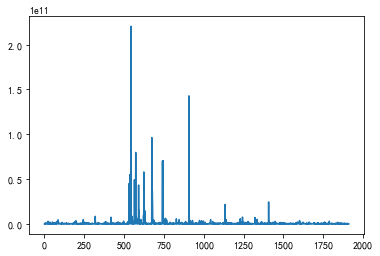

In [89]:
np.square(result_3_3.resid).plot()

#### Simple OLS Model for Model_3_3

In [90]:
Pooledmod_3_3 = pnd.PooledOLS(panel.sale_cum, panel[log_1_list+log_2_list+dummies])
Pooled_res_3_3 = Pooledmod_3_3.fit(cov_type='robust')
print(Pooled_res_3_3)

                          PooledOLS Estimation Summary                          
Dep. Variable:               sale_cum   R-squared:                        0.4488
Estimator:                  PooledOLS   R-squared (Between):              0.4488
No. Observations:                1873   R-squared (Within):               0.0000
Date:                Sun, May 29 2022   R-squared (Overall):              0.4488
Time:                        20:51:37   Log-likelihood                -2.219e+04
Cov. Estimator:                Robust                                           
                                        F-statistic:                      53.654
Entities:                        1873   P-value                           0.0000
Avg Obs:                       1.0000   Distribution:                 F(28,1845)
Min Obs:                       1.0000                                           
Max Obs:                       1.0000   F-statistic (robust):             27.015
                            

#### Fixed Effect Model for Model_3_3

In [91]:
FEmod_3_3 = pnd.PanelOLS(panel.sale_cum, panel[log_1_list+log_2_list+dummies], time_effects=True,drop_absorbed=True)
FEmod_3_3 = FEmod_3_3.fit(cov_type='clustered')
print(FEmod_3_3)

                          PanelOLS Estimation Summary                           
Dep. Variable:               sale_cum   R-squared:                        0.3239
Estimator:                   PanelOLS   R-squared (Between):             -12.974
No. Observations:                1873   R-squared (Within):               0.0000
Date:                Sun, May 29 2022   R-squared (Overall):             -12.974
Time:                        20:51:37   Log-likelihood                -2.148e+04
Cov. Estimator:             Clustered                                           
                                        F-statistic:                      17.877
Entities:                        1873   P-value                           0.0000
Avg Obs:                       1.0000   Distribution:                 F(28,1045)
Min Obs:                       1.0000                                           
Max Obs:                       1.0000   F-statistic (robust):             11.103
                            

#### Random Effect Model for Model_3_3

In [92]:
#Random Effect Model is almost unavailable
#REmod_1_1 = pnd.RandomEffects(panel.sale_cum, panel[log_1_list+log_2_list+dummies])
#re_res = REmod_1_1.fit(cov_type = 'robust')
#print(re_res)

In [93]:
print(variables)
print(dependent)
print(others)
print(dummies)
print(log_1)
print(log_2)
print(log_1_list)
print(log_2_list)

['num_photo', 'announce_value_mean', 'range_min', 'story_length', 'comment_length', 'comment_likes', 'director_num', 'actor_num_new']
['Score', 'sale_1stWeek', 'sale_cum']
['time', 'on_show_y', 'on_show_m', 'on_show_d']
['ver_bin', 'flim_冒险', 'flim_剧情', 'flim_动作', 'flim_动画', 'flim_喜剧', 'flim_奇幻', 'flim_家庭', 'flim_悬疑', 'flim_惊悚', 'flim_爱情', 'flim_犯罪', 'flim_科幻', 'country_大陆', 'country_香港', 'country_台湾', 'country_日本', 'country_美国', 'story_symbol', 'reward_dummy']
['num_photo', 'announce_value_mean', 'comment_likes', 'director_num', 'actor_num_new']
['story_length', 'comment_length', 'range_min']
['log_num_photo', 'log_announce_value_mean', 'log_comment_likes', 'log_director_num', 'log_actor_num_new']
['log_story_length', 'log_comment_length', 'log_range_min']


### Model 4 sets -> OLS with partial transformation in variables and dependent

In [94]:
var_str = ''
for i in log_1_list:
    var_str = var_str + i + '+'
for i in log_2:
    var_str = var_str + i + '+'
var_str = var_str[:-1]
dum_str = ''
for i in dummies:
    dum_str = dum_str + i + '+'
dum_str = dum_str[:-1]
independent = var_str + '+' + dum_str
independent

'log_num_photo+log_announce_value_mean+log_comment_likes+log_director_num+log_actor_num_new+story_length+comment_length+range_min+ver_bin+flim_冒险+flim_剧情+flim_动作+flim_动画+flim_喜剧+flim_奇幻+flim_家庭+flim_悬疑+flim_惊悚+flim_爱情+flim_犯罪+flim_科幻+country_大陆+country_香港+country_台湾+country_日本+country_美国+story_symbol+reward_dummy'

#### sub_model 2 for y = log_sale_1stWeek

In [95]:
formula = 'log_sale_1stWeek~' + independent
result_4_2 = ols(formula,data).fit()
result_4_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       log_sale_1stWeek   R-squared:                       0.644
Model:                            OLS   Adj. R-squared:                  0.639
Method:                 Least Squares   F-statistic:                     119.3
Date:                Sun, 29 May 2022   Prob (F-statistic):               0.00
Time:                        20:51:37   Log-Likelihood:                -3287.2
No. Observations:                1873   AIC:                             6632.
Df Residuals:                    1844   BIC:                             6793.
Df Model:                          28                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                  -2.9947      0.421     -7.121      0.000      -3.820      -2.170
log_num_photo               1.3826      0.067     20.654      0.000       1.251       1.514
log_announce_value_mean    -0.0112      0.012     -0.917      0.359      -0.035       0.013
log_comment_likes           0.3715      0.019     20.031      0.000       0.335       0.408
log_director_num            0.0413      0.098      0.421      0.674      -0.151       0.234
log_actor_num_new           0.0049      0.040      0.124      0.902      -0.073       0.083
story_length                0.0003      0.000      1.265      0.206      -0.000       0.001
comment_length              0.0026      0.001      4.144      0.000       0.001       0.004
range_min                  -0.0003      0.003     -0.127      0.899      -0.006       0.005
ver_bin                     0.5235      0.099      5.273      0.000       0.329       0.718
flim_冒险                     0.2799      0.102      2.751      0.006       0.080       0.479
flim_剧情                    -0.1160      0.084     -1.374      0.170      -0.282       0.050
flim_动作                     0.2697      0.098      2.762      0.006       0.078       0.461
flim_动画                     0.5025      0.122      4.104      0.000       0.262       0.743
flim_喜剧                     0.3981      0.081      4.918      0.000       0.239       0.557
flim_奇幻                     0.0577      0.112      0.516      0.606      -0.161       0.277
flim_家庭                     0.1157      0.124      0.932      0.351      -0.128       0.359
flim_悬疑                    -0.0315      0.117     -0.269      0.788      -0.261       0.198
flim_惊悚                     0.7485      0.132      5.670      0.000       0.490       1.007
flim_爱情                     0.2158      0.092      2.334      0.020       0.034       0.397
flim_犯罪                     0.4819      0.120      4.014      0.000       0.246       0.717
flim_科幻                     0.0798      0.131      0.608      0.544      -0.178       0.337
country_大陆                  0.4151      0.104      4.006      0.000       0.212       0.618
country_香港                  0.3948      0.179      2.201      0.028       0.043       0.747
country_台湾                  0.2882      0.256      1.128      0.260      -0.213       0.789
country_日本                  0.1483      0.183      0.812      0.417      -0.210       0.507
country_美国                 -0.2189      0.130     -1.678      0.094      -0.475       0.037
story_symbol               -0.1920      0.104     -1.839      0.066      -0.397       0.013
reward_dummy               -0.0924      0.081     -1.140      0.254      -0.251       0.067
==============================================================================
Omnibus:                      424.300   Durbin-Watson:      

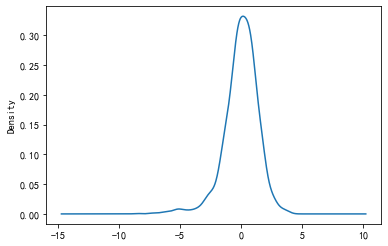

In [96]:
plt.figure()
#ols.fit().model is a method to access to the residual.
result_4_2.resid.plot.density()
plt.show()

In [97]:
stats.kstest(result_4_2.resid, 'norm', (result_4_2.resid.mean(), result_4_2.resid.std()))

KstestResult(statistic=0.06963803827078358, pvalue=2.4200873758553525e-08)

<AxesSubplot:>

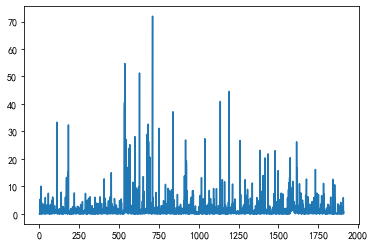

In [98]:
np.square(result_4_2.resid).plot()

#### Simple OLS Model for Model_4_2

In [99]:
Pooledmod_4_2 = pnd.PooledOLS(panel.log_sale_1stWeek, panel[log_1_list+log_2+dummies])
Pooled_res_4_2 = Pooledmod_4_2.fit(cov_type='robust')
print(Pooled_res_4_2)

                          PooledOLS Estimation Summary                          
Dep. Variable:       log_sale_1stWeek   R-squared:                        0.9621
Estimator:                  PooledOLS   R-squared (Between):              0.9621
No. Observations:                1873   R-squared (Within):               0.0000
Date:                Sun, May 29 2022   R-squared (Overall):              0.9621
Time:                        20:51:38   Log-likelihood                   -3312.6
Cov. Estimator:                Robust                                           
                                        F-statistic:                      1670.9
Entities:                        1873   P-value                           0.0000
Avg Obs:                       1.0000   Distribution:                 F(28,1845)
Min Obs:                       1.0000                                           
Max Obs:                       1.0000   F-statistic (robust):             2031.2
                            

#### Fixed Effect Model for Model_4_2

In [100]:
FEmod_4_2 = pnd.PanelOLS(panel.log_sale_1stWeek, panel[log_1_list+log_2+dummies], time_effects=True,drop_absorbed=True)
FEmod_4_2 = FEmod_4_2.fit(cov_type='clustered')
print(FEmod_4_2)

                          PanelOLS Estimation Summary                           
Dep. Variable:       log_sale_1stWeek   R-squared:                        0.6866
Estimator:                   PanelOLS   R-squared (Between):              0.9166
No. Observations:                1873   R-squared (Within):               0.0000
Date:                Sun, May 29 2022   R-squared (Overall):              0.9166
Time:                        20:51:38   Log-likelihood                   -2473.6
Cov. Estimator:             Clustered                                           
                                        F-statistic:                      81.763
Entities:                        1873   P-value                           0.0000
Avg Obs:                       1.0000   Distribution:                 F(28,1045)
Min Obs:                       1.0000                                           
Max Obs:                       1.0000   F-statistic (robust):             71.792
                            

#### Random Effect Model for Model_4_2

In [101]:
#Random Effect Model is almost unavailable
#REmod_1_1 = pnd.RandomEffects(panel.log_sale_1stWeek, panel[log_1_list+log_2+dummies])
#re_res = REmod_1_1.fit(cov_type = 'robust')
#print(re_res)

#### sub_model 3 for y = log_sale_cum

In [102]:
formula = 'log_sale_cum~' + independent
result_4_3 = ols(formula,data).fit()
result_4_3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           log_sale_cum   R-squared:                       0.742
Model:                            OLS   Adj. R-squared:                  0.738
Method:                 Least Squares   F-statistic:                     189.1
Date:                Sun, 29 May 2022   Prob (F-statistic):               0.00
Time:                        20:51:39   Log-Likelihood:                -2986.7
No. Observations:                1873   AIC:                             6031.
Df Residuals:                    1844   BIC:                             6192.
Df Model:                          28                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                  -2.8171      0.358     -7.864      0.000      -3.520      -2.115
log_num_photo               1.2484      0.057     21.895      0.000       1.137       1.360
log_announce_value_mean    -0.0195      0.010     -1.880      0.060      -0.040       0.001
log_comment_likes           0.4468      0.016     28.284      0.000       0.416       0.478
log_director_num            0.0379      0.084      0.453      0.650      -0.126       0.202
log_actor_num_new           0.0223      0.034      0.656      0.512      -0.044       0.089
story_length                0.0005      0.000      2.593      0.010       0.000       0.001
comment_length              0.0030      0.001      5.698      0.000       0.002       0.004
range_min                   0.0089      0.002      3.787      0.000       0.004       0.013
ver_bin                     0.5249      0.085      6.207      0.000       0.359       0.691
flim_冒险                     0.1548      0.087      1.786      0.074      -0.015       0.325
flim_剧情                    -0.1819      0.072     -2.529      0.012      -0.323      -0.041
flim_动作                     0.1236      0.083      1.487      0.137      -0.039       0.287
flim_动画                     0.8024      0.104      7.695      0.000       0.598       1.007
flim_喜剧                     0.3657      0.069      5.304      0.000       0.231       0.501
flim_奇幻                    -0.1080      0.095     -1.136      0.256      -0.295       0.079
flim_家庭                    -0.0457      0.106     -0.433      0.665      -0.253       0.162
flim_悬疑                    -0.1287      0.100     -1.291      0.197      -0.324       0.067
flim_惊悚                     0.7332      0.112      6.520      0.000       0.513       0.954
flim_爱情                    -0.0373      0.079     -0.474      0.636      -0.192       0.117
flim_犯罪                     0.3393      0.102      3.318      0.001       0.139       0.540
flim_科幻                     0.0651      0.112      0.582      0.561      -0.154       0.284
country_大陆                  0.6814      0.088      7.720      0.000       0.508       0.854
country_香港                  0.6487      0.153      4.245      0.000       0.349       0.948
country_台湾                  0.2710      0.218      1.245      0.213      -0.156       0.698
country_日本                 -0.2358      0.156     -1.515      0.130      -0.541       0.069
country_美国                  0.0361      0.111      0.325      0.745      -0.182       0.254
story_symbol               -0.0257      0.089     -0.289      0.773      -0.200       0.149
reward_dummy               -0.0492      0.069     -0.712      0.477      -0.185       0.086
==============================================================================
Omnibus:                       12.017   Durbin-Watson:      

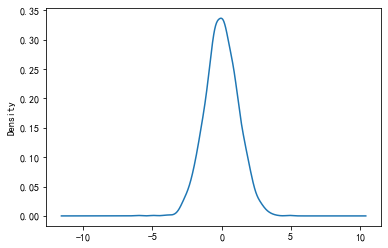

In [103]:
plt.figure()
#ols.fit().model is a method to access to the residual.
result_4_3.resid.plot.density()
plt.show()

In [104]:
stats.kstest(result_4_3.resid, 'norm', (result_4_3.resid.mean(), result_1_1.resid.std()))

KstestResult(statistic=0.06235115331076779, pvalue=8.984962122765633e-07)

<AxesSubplot:>

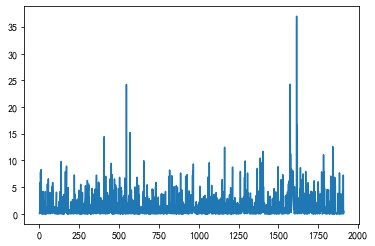

In [105]:
np.square(result_4_3.resid).plot()

#### Simple OLS Model for Model_4_3

In [106]:
Pooledmod_4_3 = pnd.PooledOLS(panel.log_sale_cum, panel[log_1_list+log_2+dummies])
Pooled_res_4_3 = Pooledmod_4_3.fit(cov_type='robust')
print(Pooled_res_4_3)

                          PooledOLS Estimation Summary                          
Dep. Variable:           log_sale_cum   R-squared:                        0.9775
Estimator:                  PooledOLS   R-squared (Between):              0.9775
No. Observations:                1873   R-squared (Within):               0.0000
Date:                Sun, May 29 2022   R-squared (Overall):              0.9775
Time:                        20:51:40   Log-likelihood                   -3017.6
Cov. Estimator:                Robust                                           
                                        F-statistic:                      2856.2
Entities:                        1873   P-value                           0.0000
Avg Obs:                       1.0000   Distribution:                 F(28,1845)
Min Obs:                       1.0000                                           
Max Obs:                       1.0000   F-statistic (robust):             3945.6
                            

#### Fixed Effect Model for Model_4_3

In [107]:
FEmod_4_3 = pnd.PanelOLS(panel.log_sale_cum, panel[log_1_list+log_2+dummies], time_effects=True,drop_absorbed=True)
FEmod_4_3 = FEmod_4_3.fit(cov_type='clustered')
print(FEmod_4_3)

                          PanelOLS Estimation Summary                           
Dep. Variable:           log_sale_cum   R-squared:                        0.7715
Estimator:                   PanelOLS   R-squared (Between):              0.9347
No. Observations:                1873   R-squared (Within):               0.0000
Date:                Sun, May 29 2022   R-squared (Overall):              0.9347
Time:                        20:51:40   Log-likelihood                   -2194.2
Cov. Estimator:             Clustered                                           
                                        F-statistic:                      126.00
Entities:                        1873   P-value                           0.0000
Avg Obs:                       1.0000   Distribution:                 F(28,1045)
Min Obs:                       1.0000                                           
Max Obs:                       1.0000   F-statistic (robust):             108.74
                            

#### Random Effect Model for Model_4_3

In [108]:
#Random Effect Model is almost unavailable
#REmod_1_1 = pnd.RandomEffects(panel.log_sale_cum, panel[log_1_list+log_2+dummies])
#re_res = REmod_1_1.fit(cov_type = 'robust')
#print(re_res)

### Model 5 sets -> OLS with fully transformation in variables and dependent

In [109]:
var_str = ''
for i in log_1_list:
    var_str = var_str + i + '+'
for i in log_2_list:
    var_str = var_str + i + '+'
var_str = var_str[:-1]
dum_str = ''
for i in dummies:
    dum_str = dum_str + i + '+'
dum_str = dum_str[:-1]
independent = var_str + '+' + dum_str
independent

'log_num_photo+log_announce_value_mean+log_comment_likes+log_director_num+log_actor_num_new+log_story_length+log_comment_length+log_range_min+ver_bin+flim_冒险+flim_剧情+flim_动作+flim_动画+flim_喜剧+flim_奇幻+flim_家庭+flim_悬疑+flim_惊悚+flim_爱情+flim_犯罪+flim_科幻+country_大陆+country_香港+country_台湾+country_日本+country_美国+story_symbol+reward_dummy'

#### sub_model 2 for y = log_sale_1stWeek

In [110]:
formula = 'log_sale_1stWeek~' + independent
result_5_2 = ols(formula,data).fit()
result_5_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       log_sale_1stWeek   R-squared:                       0.648
Model:                            OLS   Adj. R-squared:                  0.642
Method:                 Least Squares   F-statistic:                     121.1
Date:                Sun, 29 May 2022   Prob (F-statistic):               0.00
Time:                        20:51:40   Log-Likelihood:                -3278.4
No. Observations:                1873   AIC:                             6615.
Df Residuals:                    1844   BIC:                             6775.
Df Model:                          28                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                  -5.6903      1.407     -4.045      0.000      -8.449      -2.931
log_num_photo               1.3381      0.067     19.833      0.000       1.206       1.470
log_announce_value_mean    -0.0150      0.012     -1.233      0.218      -0.039       0.009
log_comment_likes           0.3592      0.019     18.895      0.000       0.322       0.396
log_director_num            0.0399      0.098      0.408      0.683      -0.152       0.231
log_actor_num_new           0.0068      0.040      0.170      0.865      -0.071       0.085
log_story_length            0.1672      0.074      2.247      0.025       0.021       0.313
log_comment_length          0.5213      0.092      5.679      0.000       0.341       0.701
log_range_min              -0.0044      0.293     -0.015      0.988      -0.579       0.570
ver_bin                     0.5134      0.099      5.193      0.000       0.320       0.707
flim_冒险                     0.2810      0.101      2.775      0.006       0.082       0.480
flim_剧情                    -0.1286      0.084     -1.529      0.126      -0.294       0.036
flim_动作                     0.2762      0.097      2.843      0.005       0.086       0.467
flim_动画                     0.5191      0.122      4.246      0.000       0.279       0.759
flim_喜剧                     0.4010      0.080      4.987      0.000       0.243       0.559
flim_奇幻                     0.0540      0.111      0.485      0.627      -0.164       0.272
flim_家庭                     0.0932      0.124      0.753      0.451      -0.149       0.336
flim_悬疑                    -0.0340      0.117     -0.292      0.770      -0.263       0.195
flim_惊悚                     0.7678      0.131      5.842      0.000       0.510       1.026
flim_爱情                     0.2087      0.092      2.265      0.024       0.028       0.389
flim_犯罪                     0.4590      0.119      3.841      0.000       0.225       0.693
flim_科幻                     0.0868      0.131      0.664      0.507      -0.170       0.343
country_大陆                  0.4570      0.104      4.407      0.000       0.254       0.660
country_香港                  0.4169      0.179      2.333      0.020       0.066       0.767
country_台湾                  0.3183      0.255      1.250      0.211      -0.181       0.818
country_日本                  0.1374      0.182      0.755      0.450      -0.220       0.494
country_美国                 -0.1927      0.130     -1.482      0.138      -0.448       0.062
story_symbol               -0.2090      0.104     -2.010      0.045      -0.413      -0.005
reward_dummy               -0.1042      0.081     -1.292      0.197      -0.262       0.054
==============================================================================
Omnibus:                      411.937   Durbin-Watson:      

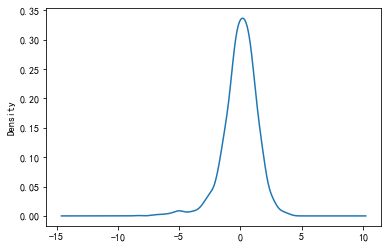

In [111]:
plt.figure()
#ols.fit().model is a method to access to the residual.
result_5_2.resid.plot.density()
plt.show()

In [112]:
stats.kstest(result_5_2.resid, 'norm', (result_5_2.resid.mean(), result_5_2.resid.std()))

KstestResult(statistic=0.06930980392132285, pvalue=2.8725970715595972e-08)

<AxesSubplot:>

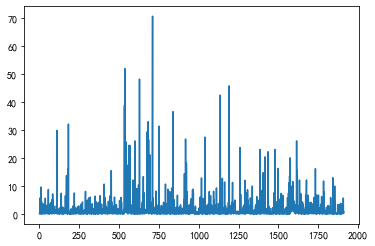

In [113]:
np.square(result_5_2.resid).plot()

#### Simple OLS Model for Model_5_2

In [114]:
Pooledmod_5_2 = pnd.PooledOLS(panel.log_sale_1stWeek, panel[log_1_list+log_2_list+dummies])
Pooled_res_5_2 = Pooledmod_5_2.fit(cov_type='robust')
print(Pooled_res_5_2)

                          PooledOLS Estimation Summary                          
Dep. Variable:       log_sale_1stWeek   R-squared:                        0.9631
Estimator:                  PooledOLS   R-squared (Between):              0.9631
No. Observations:                1873   R-squared (Within):               0.0000
Date:                Sun, May 29 2022   R-squared (Overall):              0.9631
Time:                        20:51:41   Log-likelihood                   -3286.6
Cov. Estimator:                Robust                                           
                                        F-statistic:                      1719.7
Entities:                        1873   P-value                           0.0000
Avg Obs:                       1.0000   Distribution:                 F(28,1845)
Min Obs:                       1.0000                                           
Max Obs:                       1.0000   F-statistic (robust):             2070.0
                            

#### Fixed Effect Model for Model_5_2

In [115]:
FEmod_5_2 = pnd.PanelOLS(panel.log_sale_1stWeek, panel[log_1_list+log_2_list+dummies], time_effects=True,drop_absorbed=True)
FEmod_5_2 = FEmod_5_2.fit(cov_type='clustered')
print(FEmod_5_2)

                          PanelOLS Estimation Summary                           
Dep. Variable:       log_sale_1stWeek   R-squared:                        0.6917
Estimator:                   PanelOLS   R-squared (Between):              0.4603
No. Observations:                1873   R-squared (Within):               0.0000
Date:                Sun, May 29 2022   R-squared (Overall):              0.4603
Time:                        20:51:41   Log-likelihood                   -2458.0
Cov. Estimator:             Clustered                                           
                                        F-statistic:                      83.753
Entities:                        1873   P-value                           0.0000
Avg Obs:                       1.0000   Distribution:                 F(28,1045)
Min Obs:                       1.0000                                           
Max Obs:                       1.0000   F-statistic (robust):             75.267
                            

#### Random Effect Model for Model_5_2

In [116]:
#Random Effect Model is almost unavailable
#REmod_1_1 = pnd.RandomEffects(panel.log_sale_1stWeek, panel[log_1_list+log_2_list+dummies])
#re_res = REmod_1_1.fit(cov_type = 'robust')
#print(re_res)

#### sub_model 3 for y = log_sale_cum

In [117]:
formula = 'log_sale_cum~' + independent
result_5_3 = ols(formula,data).fit()
result_5_3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           log_sale_cum   R-squared:                       0.743
Model:                            OLS   Adj. R-squared:                  0.739
Method:                 Least Squares   F-statistic:                     190.2
Date:                Sun, 29 May 2022   Prob (F-statistic):               0.00
Time:                        20:51:41   Log-Likelihood:                -2982.7
No. Observations:                1873   AIC:                             6023.
Df Residuals:                    1844   BIC:                             6184.
Df Model:                          28                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                  -9.0294      1.201     -7.516      0.000     -11.386      -6.673
log_num_photo               1.2207      0.058     21.188      0.000       1.108       1.334
log_announce_value_mean    -0.0232      0.010     -2.235      0.026      -0.044      -0.003
log_comment_likes           0.4394      0.016     27.070      0.000       0.408       0.471
log_director_num            0.0367      0.083      0.440      0.660      -0.127       0.200
log_actor_num_new           0.0258      0.034      0.758      0.448      -0.041       0.092
log_story_length            0.1894      0.064      2.981      0.003       0.065       0.314
log_comment_length          0.4986      0.078      6.361      0.000       0.345       0.652
log_range_min               0.9635      0.250      3.854      0.000       0.473       1.454
ver_bin                     0.5156      0.084      6.107      0.000       0.350       0.681
flim_冒险                     0.1535      0.086      1.776      0.076      -0.016       0.323
flim_剧情                    -0.1876      0.072     -2.612      0.009      -0.328      -0.047
flim_动作                     0.1217      0.083      1.466      0.143      -0.041       0.284
flim_动画                     0.8118      0.104      7.777      0.000       0.607       1.017
flim_喜剧                     0.3564      0.069      5.189      0.000       0.222       0.491
flim_奇幻                    -0.1115      0.095     -1.174      0.240      -0.298       0.075
flim_家庭                    -0.0607      0.106     -0.574      0.566      -0.268       0.146
flim_悬疑                    -0.1348      0.100     -1.354      0.176      -0.330       0.060
flim_惊悚                     0.7403      0.112      6.596      0.000       0.520       0.960
flim_爱情                    -0.0488      0.079     -0.620      0.535      -0.203       0.106
flim_犯罪                     0.3094      0.102      3.033      0.002       0.109       0.510
flim_科幻                     0.0771      0.112      0.691      0.490      -0.142       0.296
country_大陆                  0.7133      0.089      8.056      0.000       0.540       0.887
country_香港                  0.6685      0.153      4.380      0.000       0.369       0.968
country_台湾                  0.2947      0.217      1.355      0.176      -0.132       0.721
country_日本                 -0.2444      0.155     -1.572      0.116      -0.549       0.060
country_美国                  0.0549      0.111      0.495      0.621      -0.163       0.273
story_symbol               -0.0306      0.089     -0.345      0.730      -0.205       0.144
reward_dummy               -0.0487      0.069     -0.707      0.480      -0.184       0.086
==============================================================================
Omnibus:                       12.020   Durbin-Watson:      

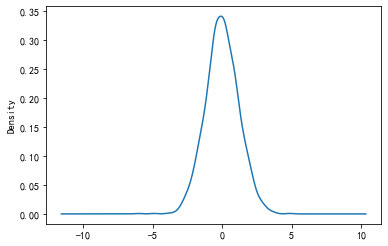

In [118]:
plt.figure()
#ols.fit().model is a method to access to the residual.
result_5_3.resid.plot.density()
plt.show()

In [119]:
stats.kstest(result_5_3.resid, 'norm', (result_5_3.resid.mean(), result_5_3.resid.std()))

KstestResult(statistic=0.015523830629283641, pvalue=0.751299249149562)

<AxesSubplot:>

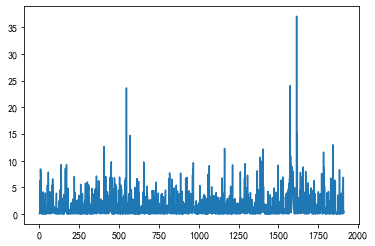

In [120]:
np.square(result_5_3.resid).plot()

#### Simple OLS Model for Model_5_3

In [121]:
Pooledmod_5_3 = pnd.PooledOLS(panel.log_sale_cum, panel[log_1_list+log_2_list+dummies])
Pooled_res_5_3 = Pooledmod_5_3.fit(cov_type='robust')
print(Pooled_res_5_3)

                          PooledOLS Estimation Summary                          
Dep. Variable:           log_sale_cum   R-squared:                        0.9776
Estimator:                  PooledOLS   R-squared (Between):              0.9776
No. Observations:                1873   R-squared (Within):               0.0000
Date:                Sun, May 29 2022   R-squared (Overall):              0.9776
Time:                        20:51:42   Log-likelihood                   -3010.9
Cov. Estimator:                Robust                                           
                                        F-statistic:                      2877.1
Entities:                        1873   P-value                           0.0000
Avg Obs:                       1.0000   Distribution:                 F(28,1845)
Min Obs:                       1.0000                                           
Max Obs:                       1.0000   F-statistic (robust):             3921.2
                            

#### Fixed Effect Model for Model_5_3

In [122]:
FEmod_5_3 = pnd.PanelOLS(panel.log_sale_cum, panel[log_1_list+log_2_list+dummies], time_effects=True,drop_absorbed=True)
FEmod_5_3 = FEmod_5_3.fit(cov_type='clustered')
print(FEmod_5_3)

                          PanelOLS Estimation Summary                           
Dep. Variable:           log_sale_cum   R-squared:                        0.7748
Estimator:                   PanelOLS   R-squared (Between):              0.2695
No. Observations:                1873   R-squared (Within):               0.0000
Date:                Sun, May 29 2022   R-squared (Overall):              0.2695
Time:                        20:51:43   Log-likelihood                   -2180.5
Cov. Estimator:             Clustered                                           
                                        F-statistic:                      128.41
Entities:                        1873   P-value                           0.0000
Avg Obs:                       1.0000   Distribution:                 F(28,1045)
Min Obs:                       1.0000                                           
Max Obs:                       1.0000   F-statistic (robust):             109.15
                            

#### Random Effect Model for Model_5_3

In [123]:
#Random Effect Model is almost unavailable
#REmod_1_1 = pnd.RandomEffects(panel.log_sale_1stWeek, panel[log_1_list+log_2_list+dummies])
#re_res = REmod_1_1.fit(cov_type = 'robust')
#print(re_res)

### Model 6 评分与票房的相关性与因果性分析

In [124]:
formula = 'log_sale_cum~Score+const'
result_6_1 = ols(formula,data).fit()
result_6_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           log_sale_cum   R-squared:                       0.190
Model:                            OLS   Adj. R-squared:                  0.190
Method:                 Least Squares   F-statistic:                     439.6
Date:                Sun, 29 May 2022   Prob (F-statistic):           7.70e-88
Time:                        20:51:43   Log-Likelihood:                -4056.6
No. Observations:                1873   AIC:                             8117.
Df Residuals:                    1871   BIC:                             8128.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.5631      0.159      3.538      0.000       0.251       0.875
Score          0.8387      0.040     20.967      0.000       0.760       0.917
const          0.5631      0.159      3.538      0.000       0.251       0.875
==============================================================================
Omnibus:                       34.764   Durbin-Watson:                   1.065
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               31.004
Skew:                          -0.261   Prob(JB):                     1.85e-07
Kurtosis:                       2.647   Cond. No.                     3.71e+16
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 8.91e-29. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

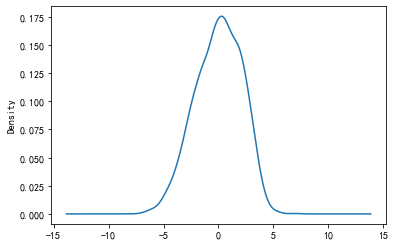

In [125]:
plt.figure()
#ols.fit().model is a method to access to the residual.
result_6_1.resid.plot.density()
plt.show()

In [126]:
stats.kstest(result_6_1.resid, 'norm', (result_6_1.resid.mean(), result_6_1.resid.std()))

KstestResult(statistic=0.03243611997359519, pvalue=0.03800197351003842)

<AxesSubplot:>

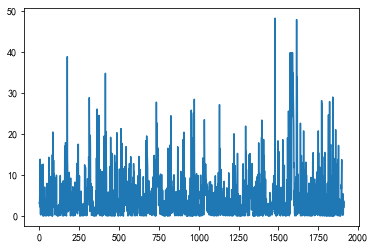

In [127]:
np.square(result_6_1.resid).plot()

In [128]:
Pooledmod_6_1 = pnd.PooledOLS(panel.log_sale_cum, panel[['Score','const']])
Pooled_res_6_1 = Pooledmod_6_1.fit(cov_type='robust')
print(Pooled_res_6_1)

                          PooledOLS Estimation Summary                          
Dep. Variable:           log_sale_cum   R-squared:                        0.1903
Estimator:                  PooledOLS   R-squared (Between):              0.1903
No. Observations:                1873   R-squared (Within):               0.0000
Date:                Sun, May 29 2022   R-squared (Overall):              0.1903
Time:                        20:51:44   Log-likelihood                   -4056.6
Cov. Estimator:                Robust                                           
                                        F-statistic:                      439.59
Entities:                        1873   P-value                           0.0000
Avg Obs:                       1.0000   Distribution:                  F(1,1871)
Min Obs:                       1.0000                                           
Max Obs:                       1.0000   F-statistic (robust):             431.63
                            

In [129]:
FEmod_6_1 = pnd.PanelOLS(panel.log_sale_cum, panel[['Score','const']], time_effects=True,drop_absorbed=True)
FEmod_6_1 = FEmod_6_1.fit(cov_type='clustered')
print(FEmod_6_1)

                          PanelOLS Estimation Summary                           
Dep. Variable:           log_sale_cum   R-squared:                        0.2119
Estimator:                   PanelOLS   R-squared (Between):              0.1902
No. Observations:                1873   R-squared (Within):               0.0000
Date:                Sun, May 29 2022   R-squared (Overall):              0.1902
Time:                        20:51:44   Log-likelihood                   -3353.7
Cov. Estimator:             Clustered                                           
                                        F-statistic:                      288.18
Entities:                        1873   P-value                           0.0000
Avg Obs:                       1.0000   Distribution:                  F(1,1072)
Min Obs:                       1.0000                                           
Max Obs:                       1.0000   F-statistic (robust):             239.39
                            

In [130]:
FEmod_6_1_f = pnd.PanelOLS(panel.log_sale_cum, panel[log_1_list+log_2_list+dummies+['Score']], time_effects=True,drop_absorbed=True)
FEmod_6_1_f = FEmod_6_1_f.fit(cov_type='clustered')
print(FEmod_6_1_f)

                          PanelOLS Estimation Summary                           
Dep. Variable:           log_sale_cum   R-squared:                        0.7773
Estimator:                   PanelOLS   R-squared (Between):              0.2695
No. Observations:                1873   R-squared (Within):               0.0000
Date:                Sun, May 29 2022   R-squared (Overall):              0.2695
Time:                        20:51:44   Log-likelihood                   -2169.9
Cov. Estimator:             Clustered                                           
                                        F-statistic:                      125.69
Entities:                        1873   P-value                           0.0000
Avg Obs:                       1.0000   Distribution:                 F(29,1044)
Min Obs:                       1.0000                                           
Max Obs:                       1.0000   F-statistic (robust):             108.58
                            

In [131]:
data.columns

Index(['const', 'Score', 'num_photo', 'ver_bin', 'announce_value_mean',
       'flim_冒险', 'flim_剧情', 'flim_动作', 'flim_动画', 'flim_喜剧', 'flim_奇幻',
       'flim_家庭', 'flim_悬疑', 'flim_惊悚', 'flim_爱情', 'flim_犯罪', 'flim_科幻',
       'country_大陆', 'country_香港', 'country_台湾', 'country_日本', 'country_美国',
       'range_min', 'time', 'on_show_y', 'on_show_m', 'on_show_d',
       'story_length', 'story_symbol', 'comment_length', 'comment_likes',
       'sale_1stWeek', 'sale_cum', 'director_num', 'actor_num_new',
       'reward_dummy', 'id', 'log_num_photo', 'log_announce_value_mean',
       'log_comment_likes', 'log_director_num', 'log_actor_num_new',
       'log_story_length', 'log_comment_length', 'log_range_min',
       'log_sale_1stWeek', 'log_sale_cum'],
      dtype='object')

In [132]:
panel.columns

Index(['const', 'Score', 'num_photo', 'ver_bin', 'announce_value_mean',
       'flim_冒险', 'flim_剧情', 'flim_动作', 'flim_动画', 'flim_喜剧', 'flim_奇幻',
       'flim_家庭', 'flim_悬疑', 'flim_惊悚', 'flim_爱情', 'flim_犯罪', 'flim_科幻',
       'country_大陆', 'country_香港', 'country_台湾', 'country_日本', 'country_美国',
       'range_min', 'on_show_y', 'on_show_m', 'on_show_d', 'story_length',
       'story_symbol', 'comment_length', 'comment_likes', 'sale_1stWeek',
       'sale_cum', 'director_num', 'actor_num_new', 'reward_dummy',
       'log_num_photo', 'log_announce_value_mean', 'log_comment_likes',
       'log_director_num', 'log_actor_num_new', 'log_story_length',
       'log_comment_length', 'log_range_min', 'log_sale_1stWeek',
       'log_sale_cum'],
      dtype='object')

In [133]:
panel['time'] = data.time

In [134]:
data['date_time'] = data.time

In [135]:
panel_IV = data.set_index(['id','time'])

#### IV Method

In [136]:
var_str = ''
for i in log_1_list:
    if i != 'log_range_min':
        var_str = var_str + i + '+'
for i in log_2_list:
    var_str = var_str + i + '+'
var_str = var_str[:-1]
dum_str = ''
for i in dummies:
    dum_str = dum_str + i + '+'
dum_str = dum_str[:-1]
independent = var_str + '+' + dum_str

In [137]:
paneliv_res_1 =IV2SLS.from_formula("log_sale_cum ~ 1+[Score~log_range_min]", panel_IV).fit()
print(paneliv_res_1)

                          IV-2SLS Estimation Summary                          
Dep. Variable:           log_sale_cum   R-squared:                     -0.8787
Estimator:                    IV-2SLS   Adj. R-squared:                -0.8797
No. Observations:                1873   F-statistic:                    213.68
Date:                Sun, May 29 2022   P-value (F-stat)                0.0000
Time:                        20:51:45   Distribution:                  chi2(1)
Cov. Estimator:                robust                                         
                                                                              
                             Parameter Estimates                              
            Parameter  Std. Err.     T-stat    P-value    Lower CI    Upper CI
------------------------------------------------------------------------------
Intercept     -14.508     1.5405    -9.4179     0.0000     -17.528     -11.489
Score          2.8269     0.1934     14.618     0.00

In [138]:
paneliv_res_1_t = pnd.PanelOLS(panel.log_sale_cum, panel[['Score','const','log_range_min']+dummies],time_effects=True).fit()
print(paneliv_res_1_t)

                          PanelOLS Estimation Summary                           
Dep. Variable:           log_sale_cum   R-squared:                        0.4614
Estimator:                   PanelOLS   R-squared (Between):              0.4577
No. Observations:                1873   R-squared (Within):               0.0000
Date:                Sun, May 29 2022   R-squared (Overall):              0.4577
Time:                        20:51:45   Log-likelihood                   -2997.2
Cov. Estimator:            Unadjusted                                           
                                        F-statistic:                      40.920
Entities:                        1873   P-value                           0.0000
Avg Obs:                       1.0000   Distribution:                 F(22,1051)
Min Obs:                       1.0000                                           
Max Obs:                       1.0000   F-statistic (robust):             40.920
                            

In [139]:
paneliv_res_2 = IV2SLS.from_formula("log_sale_cum ~ 1+[Score~reward_dummy]", panel_IV).fit()
print(paneliv_res_2)

                          IV-2SLS Estimation Summary                          
Dep. Variable:           log_sale_cum   R-squared:                     -0.1663
Estimator:                    IV-2SLS   Adj. R-squared:                -0.1669
No. Observations:                1873   F-statistic:                    212.53
Date:                Sun, May 29 2022   P-value (F-stat)                0.0000
Time:                        20:51:45   Distribution:                  chi2(1)
Cov. Estimator:                robust                                         
                                                                              
                             Parameter Estimates                              
            Parameter  Std. Err.     T-stat    P-value    Lower CI    Upper CI
------------------------------------------------------------------------------
Intercept     -7.9033     1.0846    -7.2865     0.0000     -10.029     -5.7774
Score          1.9870     0.1363     14.578     0.00

In [140]:
paneliv_res_2_t = pnd.PanelOLS(panel.log_sale_cum, panel[['Score','const','reward_dummy']+log_1_list+log_2_list],time_effects=True).fit()
print(paneliv_res_2_t)

                          PanelOLS Estimation Summary                           
Dep. Variable:           log_sale_cum   R-squared:                        0.7361
Estimator:                   PanelOLS   R-squared (Between):              0.6723
No. Observations:                1873   R-squared (Within):               0.0000
Date:                Sun, May 29 2022   R-squared (Overall):              0.6723
Time:                        20:51:45   Log-likelihood                   -2329.2
Cov. Estimator:            Unadjusted                                           
                                        F-statistic:                      296.45
Entities:                        1873   P-value                           0.0000
Avg Obs:                       1.0000   Distribution:                 F(10,1063)
Min Obs:                       1.0000                                           
Max Obs:                       1.0000   F-statistic (robust):             296.45
                            

In [141]:
paneliv_res_3 = IV2SLS.from_formula("log_sale_cum ~ 1+[Score~flim_家庭]", panel_IV).fit()
print(paneliv_res_3)

                          IV-2SLS Estimation Summary                          
Dep. Variable:           log_sale_cum   R-squared:                     -1.3802
Estimator:                    IV-2SLS   Adj. R-squared:                -1.3814
No. Observations:                1873   F-statistic:                    6.9931
Date:                Sun, May 29 2022   P-value (F-stat)                0.0082
Time:                        20:51:46   Distribution:                  chi2(1)
Cov. Estimator:                robust                                         
                                                                              
                             Parameter Estimates                              
            Parameter  Std. Err.     T-stat    P-value    Lower CI    Upper CI
------------------------------------------------------------------------------
Intercept      20.076     4.6818     4.2881     0.0000      10.900      29.252
Score         -1.5710     0.5941    -2.6444     0.00

In [142]:
paneliv_res_3_t = pnd.PanelOLS(panel.log_sale_cum, panel[['Score','const','flim_家庭']+log_1_list+log_2_list],time_effects=True).fit()
print(paneliv_res_3_t)

                          PanelOLS Estimation Summary                           
Dep. Variable:           log_sale_cum   R-squared:                        0.7350
Estimator:                   PanelOLS   R-squared (Between):              0.6722
No. Observations:                1873   R-squared (Within):               0.0000
Date:                Sun, May 29 2022   R-squared (Overall):              0.6722
Time:                        20:51:46   Log-likelihood                   -2332.9
Cov. Estimator:            Unadjusted                                           
                                        F-statistic:                      294.87
Entities:                        1873   P-value                           0.0000
Avg Obs:                       1.0000   Distribution:                 F(10,1063)
Min Obs:                       1.0000                                           
Max Obs:                       1.0000   F-statistic (robust):             294.87
                            

In [143]:
paneliv_res_4 = IV2SLS.from_formula("log_sale_cum ~ 1+[Score~flim_科幻]", panel_IV).fit()
print(paneliv_res_4)

                          IV-2SLS Estimation Summary                          
Dep. Variable:           log_sale_cum   R-squared:                     -20.500
Estimator:                    IV-2SLS   Adj. R-squared:                -20.511
No. Observations:                1873   F-statistic:                    4.9698
Date:                Sun, May 29 2022   P-value (F-stat)                0.0258
Time:                        20:51:46   Distribution:                  chi2(1)
Cov. Estimator:                robust                                         
                                                                              
                             Parameter Estimates                              
            Parameter  Std. Err.     T-stat    P-value    Lower CI    Upper CI
------------------------------------------------------------------------------
Intercept     -67.656     33.855    -1.9984     0.0457     -134.01     -1.3016
Score          9.5855     4.2997     2.2293     0.02

In [144]:
paneliv_res_4_t = pnd.PanelOLS(panel.log_sale_cum, panel[['Score','const','flim_科幻']+log_1_list+log_2_list],time_effects =True).fit()
print(paneliv_res_4_t)

                          PanelOLS Estimation Summary                           
Dep. Variable:           log_sale_cum   R-squared:                        0.7354
Estimator:                   PanelOLS   R-squared (Between):              0.6729
No. Observations:                1873   R-squared (Within):               0.0000
Date:                Sun, May 29 2022   R-squared (Overall):              0.6729
Time:                        20:51:46   Log-likelihood                   -2331.4
Cov. Estimator:            Unadjusted                                           
                                        F-statistic:                      295.51
Entities:                        1873   P-value                           0.0000
Avg Obs:                       1.0000   Distribution:                 F(10,1063)
Min Obs:                       1.0000                                           
Max Obs:                       1.0000   F-statistic (robust):             295.51
                            

In [145]:
paneliv_res_1_C = IV2SLS.from_formula("log_sale_cum ~ 1+C(date_time)+[Score~log_range_min]", panel_IV).fit()
print(paneliv_res_1_C)

F:\Download\lib\site-packages\linearmodels\iv\results.py:180: RuntimeWarning: invalid value encountered in sqrt
  std_errors = sqrt(diag(self.cov))


                          IV-2SLS Estimation Summary                          
Dep. Variable:           log_sale_cum   R-squared:                      0.2152
Estimator:                    IV-2SLS   Adj. R-squared:                -0.3704
No. Observations:                1873   F-statistic:                -2.176e+18
Date:                Sun, May 29 2022   P-value (F-stat)                1.0000
Time:                        20:51:52   Distribution:                chi2(800)
Cov. Estimator:                robust                                         
                                                                              
                                          Parameter Estimates                                          
                                     Parameter  Std. Err.     T-stat    P-value    Lower CI    Upper CI
-------------------------------------------------------------------------------------------------------
Intercept                              -12.391     1.517

In [146]:
paneliv_res_2_C = IV2SLS.from_formula("log_sale_cum ~ 1+C(date_time)+[Score~reward_dummy]", panel_IV).fit()
print(paneliv_res_2_C)

                          IV-2SLS Estimation Summary                          
Dep. Variable:           log_sale_cum   R-squared:                      0.5219
Estimator:                    IV-2SLS   Adj. R-squared:                 0.1650
No. Observations:                1873   F-statistic:                -1.572e+18
Date:                Sun, May 29 2022   P-value (F-stat)                1.0000
Time:                        20:52:00   Distribution:                chi2(800)
Cov. Estimator:                robust                                         
                                                                              
                                          Parameter Estimates                                          
                                     Parameter  Std. Err.     T-stat    P-value    Lower CI    Upper CI
-------------------------------------------------------------------------------------------------------
Intercept                              -5.6906     1.043

In [147]:
paneliv_res_3_C = IV2SLS.from_formula("log_sale_cum ~ 1+"+var_str+"+C(date_time)+[Score~flim_家庭]", panel_IV).fit()
print(paneliv_res_3_C)

                          IV-2SLS Estimation Summary                          
Dep. Variable:           log_sale_cum   R-squared:                      0.8710
Estimator:                    IV-2SLS   Adj. R-squared:                 0.7730
No. Observations:                1873   F-statistic:                 1.782e+17
Date:                Sun, May 29 2022   P-value (F-stat)                0.0000
Time:                        20:52:11   Distribution:                chi2(808)
Cov. Estimator:                robust                                         
                                                                              
                                          Parameter Estimates                                          
                                     Parameter  Std. Err.     T-stat    P-value    Lower CI    Upper CI
-------------------------------------------------------------------------------------------------------
Intercept                               1.8969     1.265

In [148]:
paneliv_res_4_C = IV2SLS.from_formula("log_sale_cum ~ 1+C(date_time)+"+var_str+"+[Score~flim_科幻]", panel_IV).fit()
print(paneliv_res_4_C)

                          IV-2SLS Estimation Summary                          
Dep. Variable:           log_sale_cum   R-squared:                      0.8546
Estimator:                    IV-2SLS   Adj. R-squared:                 0.7442
No. Observations:                1873   F-statistic:                -1.085e+18
Date:                Sun, May 29 2022   P-value (F-stat)                1.0000
Time:                        20:52:20   Distribution:                chi2(808)
Cov. Estimator:                robust                                         
                                                                              
                                          Parameter Estimates                                          
                                     Parameter  Std. Err.     T-stat    P-value    Lower CI    Upper CI
-------------------------------------------------------------------------------------------------------
Intercept                               2.2403     1.430